# CODER HOUSE - ENTREGA 2
### Coderhouse - Data Science II - Comisión 67410
Alumna Daniela González

# 1.-Introducción








### Objetivo Principal




*   Analizar los indices de suicidio en los países a través de los años 1990 a 2022, para determinar una predicción futura de estos en 5 años (2022 - 2027).

### Objetivos Específicos

1.	Analizar patrones históricos de suicidio en otros países y otras variables de mortalidad.
2.	Identificar las características más influyentes en la predicción de suicidios de cada país / continente.
3.	Desarrollar y validar modelos predictivos de machine learning.

### Motivación

El análisis de índices de suicidio busca comprender y predecir factores que afectan la tasa para ayudar a diseñar políticas y programas preventivos orientados a públicos gubernamentales, ONG y profesionales sanitarios.



### Audiencia
Politica Social general, Instituciones de salud pública, analistas de datos sociales.

### Método de analisis del Problema


Se modelará como problema de **regresión** para **predecir la tasa de suicidios** estandarizada según edad y sexo, en distintos países y años



# 2.- Carga de Datos

## Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [3]:
# Modelado y métricas
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set_style('whitegrid')


## Data Set

In [5]:
from google.colab import drive
import pandas as pd

# Carga desde Google Drive
drive.mount('/content/drive')

# Nombre ruta
file_path = '/content/drive/MyDrive/DATA SCIENCE II - DANIELA G /suicide_rates_1990-2022.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE II - DANIELA G /suicide_rates_1990-2022.csv', encoding='utf-8')

In [7]:
 df = pd.read_csv(file_path, encoding='utf-8')
 print("Archivo cargado correctamente.")

Archivo cargado correctamente.


In [8]:
print(f"Dimensiones del dataset: {df.shape}")
print(df.info())

Dimensiones del dataset: (118560, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP   

In [9]:
# Total de países únicos
total_paises = df['CountryName'].nunique()

# Total de filas con sexo femenino
total_females = df[df['Sex'] == 'Female'].shape[0]

# Total de filas con sexo masculino
total_males = df[df['Sex'] == 'Male'].shape[0]

# Mostrar resultados
print(f'Total de países: {total_paises}')
print(f'Total de registros de Female: {total_females}')
print(f'Total de registros de Male: {total_males}')


Total de países: 117
Total de registros de Female: 58320
Total de registros de Male: 58320


In [10]:
# Agrupar por año y sumar el total de suicidios para cada año
total_suicidios_por_ano = df.groupby('Year')['SuicideCount'].sum()

# Mostrar el resultado
print(total_suicidios_por_ano)




Year
1990    207445.0
1991    207584.0
1992    221963.0
1993    232369.0
1994    242419.0
1995    246721.0
1996    250971.0
1997    244684.0
1998    253835.0
1999    260404.0
2000    260399.0
2001    255585.0
2002    260762.0
2003    260753.0
2004    249909.0
2005    243557.0
2006    237695.0
2007    241510.0
2008    239457.0
2009    251156.0
2010    245953.0
2011    243574.0
2012    237397.0
2013    232651.0
2014    239013.0
2015    232275.0
2016    219232.0
2017    225172.0
2018    224599.0
2019    223129.0
2020    175606.0
2021    132955.0
2022     13955.0
Name: SuicideCount, dtype: float64


# 3.- Limpieza de Datos

## Limpieza nulos

In [11]:
print(df['Year'].isnull().sum())

0


In [12]:
print("\n📊 Estadísticas ANTES de la limpieza:")
stats_before = df.describe().T[['mean', '50%', 'std']].rename(columns={'50%':'median'})
print(stats_before)


📊 Estadísticas ANTES de la limpieza:
                                      mean        median           std
Year                          2.005740e+03  2.006000e+03  8.745003e+00
SuicideCount                  6.363204e+01  4.000000e+00  2.540954e+02
CauseSpecificDeathPercentage  3.873690e+00  5.861665e-01  7.317820e+00
DeathRatePer100K              1.229979e+01  4.452366e+00  2.101617e+01
Population                    2.456184e+07  6.888434e+06  4.531156e+07
GDP                           4.883351e+11  6.268216e+10  1.653252e+12
GDPPerCapita                  1.742351e+04  9.708141e+03  1.933214e+04
GrossNationalIncome           4.976795e+11  5.987715e+10  1.689591e+12
GNIPerCapita                  2.214722e+04  1.615000e+04  1.888640e+04
InflationRate                 2.028646e+01  3.038888e+00  1.630999e+02
EmploymentPopulationRatio     5.575081e+01  5.602100e+01  8.140994e+00


In [13]:
cols_drop = ['RegionCode','CountryCode']
df.drop(columns=cols_drop, inplace=True, errors='ignore')

# Eliminamos filas con SuicideCount nulo
df = df[df['SuicideCount'].notnull()]

# Rellenamos valores nulos numéricos con la mediana
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())

In [14]:
# Verificar valores nulos
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

Cantidad de valores nulos por columna:
RegionName                      0
CountryName                     0
Year                            0
Sex                             0
AgeGroup                        0
Generation                      0
SuicideCount                    0
CauseSpecificDeathPercentage    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GrossNationalIncome             0
GNIPerCapita                    0
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64


## Duplicados

In [15]:
print("Number of duplicates: " + str(df.duplicated().sum()))

#Los números duplicados no son exactamente malos, por lo que no se borraran. Pero, es importante tener un conteo básico de ellos.

Number of duplicates: 22412


## Limpieza Negativos

In [16]:
print(df[df['SuicideCount'] < 0])


Empty DataFrame
Columns: [RegionName, CountryName, Year, Sex, AgeGroup, Generation, SuicideCount, CauseSpecificDeathPercentage, DeathRatePer100K, Population, GDP, GDPPerCapita, GrossNationalIncome, GNIPerCapita, InflationRate, EmploymentPopulationRatio]
Index: []


In [17]:
print(df['SuicideCount'].min(), df['SuicideCount'].max())


0.0 6787.0


In [18]:
df = df[df['SuicideCount'] >= 0]


## Corregir Datos (Sexo)

Se corrige los años que aparecen con décimale, y se elimina en sexo "unknow". Debido a que es un número demasiado bajo, no es relevante para este proyecto.

In [19]:
df = df.dropna(subset=['Year'])

In [20]:
# Eliminar filas con 'Unknown' en la columna 'Sex'
df = df[df['Sex'] != 'Unknown']

# Eliminar filas que tengan NaN en 'Year'
df = df.dropna(subset=['Year'])

# Convertir 'Year' a entero
df['Year'] = df['Year'].astype(int)

# Confirmar limpieza
print("Valores únicos en 'Sex':", df['Sex'].unique())
print("Cantidad de valores nulos en 'Year':", df['Year'].isnull().sum())
print("Tipo de datos de 'Year':", df['Year'].dtype)

Valores únicos en 'Sex': ['Male' 'Female']
Cantidad de valores nulos en 'Year': 0
Tipo de datos de 'Year': int64


## Corregir Datos (Año)

Se eliminan datos del año 2022, debido a que los datos son demasiado disparejos en comparación a los último 5 años anteriores.

Total registros en 2022: 560
Registros con datos nulos en 2022: 0 (0.00%)
Total suicidios en 2022: 13955.0
Suma total suicidios últimos años 2017-2021:
Year
2017    225159.0
2018    224582.0
2019    223119.0
2020    175571.0
2021    132926.0
Name: SuicideCount, dtype: float64


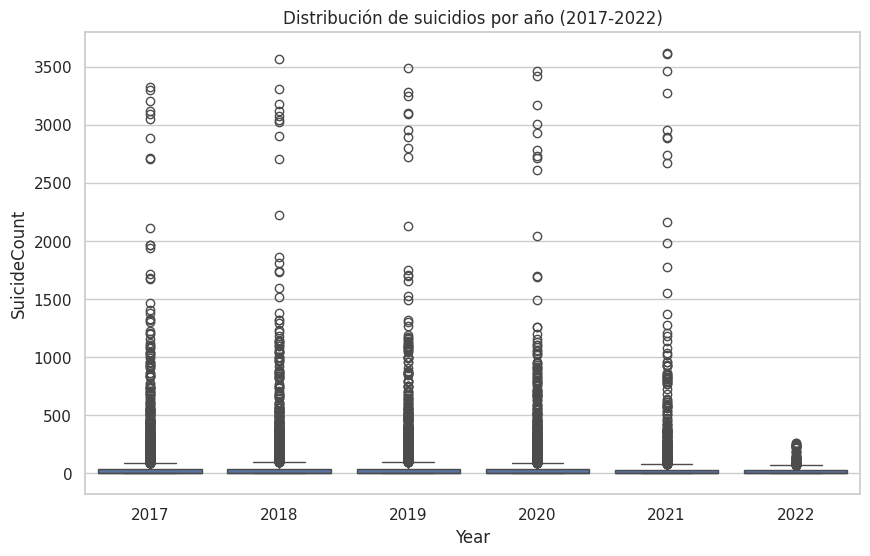

In [21]:
# Filtrar datos del año 2022
datos_2022 = df[df['Year'] == 2022]

# Cantidad total de registros en 2022
total_2022 = len(datos_2022)

# Cantidad de registros con valores nulos en 2022
nulos_2022 = datos_2022.isnull().any(axis=1).sum()

print(f"Total registros en 2022: {total_2022}")
print(f"Registros con datos nulos en 2022: {nulos_2022} ({nulos_2022/total_2022*100:.2f}%)")

# Suma total de suicidios en 2022
suma_suicidios_2022 = datos_2022['SuicideCount'].sum()
print(f"Total suicidios en 2022: {suma_suicidios_2022}")

# Comparar con años anteriores (5 años)
ultimos_años = df[df['Year'].isin(range(2017, 2022))]
suma_por_año = ultimos_años.groupby('Year')['SuicideCount'].sum()
print("Suma total suicidios últimos años 2017-2021:")
print(suma_por_año)

# Visualizar diferencia con boxplot para ver si 2022 resulta atípico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
df_filtered = df[df['Year'].isin(range(2017, 2023))]  # últimos 6 años incluyendo 2022
sns.boxplot(data=df_filtered, x='Year', y='SuicideCount')
plt.title('Distribución de suicidios por año (2017-2022)')
plt.show()


Según los datos entregados, el año 2022 está claramente subrepresentado y es incompleto en cantidad y en magnitud. Esto podría tener consecuencias en cuanto al desarrollo de la predicción de suicidios en los próximos 5 años.
Se eliminará este año apoyandome en las siguientes razones:


*   Al estar incompleto, los datos no reflejan la realidad del año 2022.
*   En los gráficos, las tasas bajarán notablemente en 2022.
*   Su muestra es pequeña en comparación al resto, por lo que podemos precindir de ella sin afectar el proyecto de proyección.
*   Evitamos conclusiones incorrectas a la larga.







In [22]:
df = df[df['Year'] != 2022].copy()



In [23]:
# Verificar que 2022 ya no está presente
print(df['Year'].unique())

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 1991 2011 2012 2013 2014 1990 2020 2019 2018
 2017 2016 2015 2021]


## Corregir Datos (Grupo Etario)

In [24]:
# Eliminar filas con 'Unknown' en la columna 'Generation'
df = df[df['Generation'] != 'Unknown']

# Confirmar limpieza
print("Valores únicos en 'Generation':", df['Generation'].unique())

Valores únicos en 'Generation': ['Generation Alpha' 'Generation Z' 'Millennials' 'Generation X'
 'Baby Boomers' 'Silent Generation']


Sen elimina "Unknow" del grupo etario, ya que los números son muy bajos como para trabajar con ellos.  

## Corregir Datos Faltantes

Se agrega continentes, a países que no aparecían con uno, ya que esto estaba imposibilizando que los datos fueran fidedignos.

In [25]:
df[['CountryName', 'RegionName']].drop_duplicates().sort_values('CountryName')


,CountryName,RegionName
0,Albania,Europe
6720,Antigua and Barbuda,North America and the Caribbean
760,Argentina,Central and South America
2040,Armenia,Asia
2920,Australia,Oceania
...,...,...
88220,United Kingdom of Great Britain and Northern I...,Europe
89220,United States of America,North America and the Caribbean
90220,Uruguay,Central and South America
91160,Uzbekistan,Asia


In [26]:
# Mapa manual de países y su región correspondiente (continente)
mapa_region_manual = {
    'Japan': 'Asia',
    'Germany': 'Europe',
    'United States of America': 'North America',
    'Russian Federation': 'Europe/Asia'  # Rusia esta entre dos continentes, se agrega un elemento solo para Rusia.
}

# Aplicar solo a las filas donde el país está en el diccionario
df.loc[df['CountryName'].isin(mapa_region_manual.keys()), 'RegionName'] = df['CountryName'].map(mapa_region_manual)


## Tasa de Suicidios por cada 100K habitantes

In [27]:
# Filtrar datos válidos para evitar división por cero o nulos
df_valid = df[df['Population'].notna() & (df['Population'] > 0) & df['SuicideCount'].notna()]

# Calcular DeathRatePer100K: tasa de suicidios por cada 100,000 habitantes
df_valid['DeathRatePer100K'] = (df_valid['SuicideCount'] / df_valid['Population']) * 100000

# Mostrar los datos calculados en la columna DeathRatePer100K
print(df_valid[['Year', 'Sex', 'AgeGroup', 'DeathRatePer100K']])

        Year     Sex     AgeGroup  DeathRatePer100K
0       1992    Male   0-14 years          0.000000
1       1992    Male   0-14 years          0.000000
2       1992    Male   0-14 years          0.000000
3       1992    Male   0-14 years          0.000000
4       1992    Male  15-24 years          0.153986
...      ...     ...          ...               ...
118554  2021  Female  55-74 years          0.175887
118555  2021  Female  55-74 years          0.126494
118556  2021  Female    75+ years          0.083125
118557  2021  Female    75+ years          0.047586
118558  2021  Female    75+ years          0.038249

[109812 rows x 4 columns]


In [28]:
# Filtrar datos válidos y calcular tasa de suicidio
df_valid = df[df['Population'].notna() & (df['Population'] > 0) & df['SuicideCount'].notna()]
df_valid['DeathRatePer100K'] = (df_valid['SuicideCount'] / df_valid['Population']) * 100000


<function matplotlib.pyplot.show(close=None, block=None)>

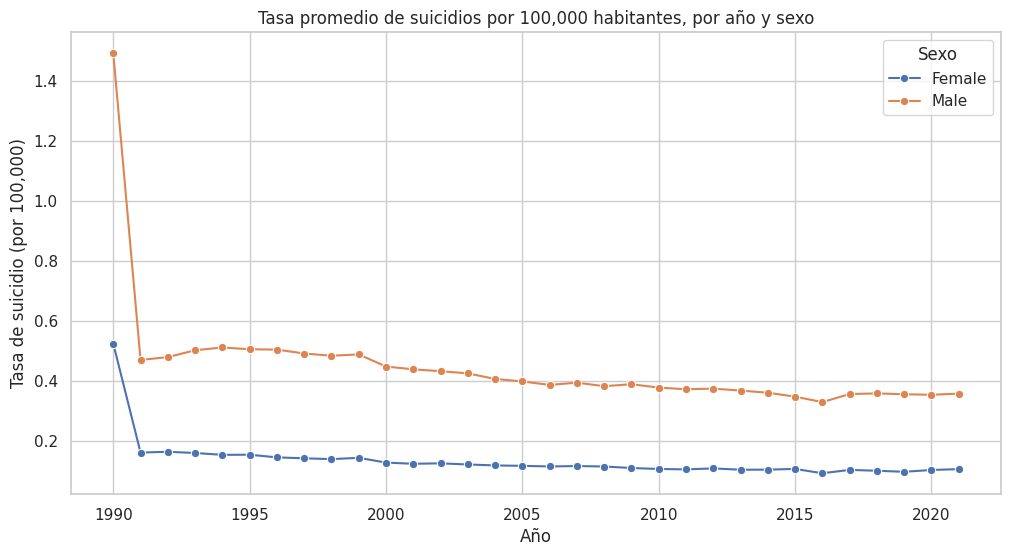

In [29]:
# Agrupar por año y sexo, calculando la media de la tasa
df_grouped = df_valid.groupby(['Year', 'Sex'])['DeathRatePer100K'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Year', y='DeathRatePer100K', hue='Sex', marker='o')
plt.title('Tasa promedio de suicidios por 100,000 habitantes, por año y sexo')
plt.ylabel('Tasa de suicidio (por 100,000)')
plt.xlabel('Año')
plt.legend(title='Sexo')
plt.grid(True)
plt.show

## Estadísticas post limpieza

In [30]:
print("\n📊 Estadísticas DESPUÉS de la limpieza:")
stats_after = df.describe().T[['mean', '50%', 'std']].rename(columns={'50%':'mediana'})
print(stats_after)


📊 Estadísticas DESPUÉS de la limpieza:
                                      mean       mediana           std
Year                          2.005594e+03  2.006000e+03  8.712576e+00
SuicideCount                  6.814743e+01  5.000000e+00  2.628889e+02
CauseSpecificDeathPercentage  3.905276e+00  6.238947e-01  7.194366e+00
DeathRatePer100K              1.213006e+01  4.452366e+00  2.083921e+01
Population                    2.292568e+07  6.932636e+06  4.344668e+07
GDP                           4.613262e+11  6.391870e+10  1.622478e+12
GDPPerCapita                  1.698479e+04  9.659339e+03  1.876877e+04
GrossNationalIncome           4.600408e+11  6.002684e+10  1.639259e+12
GNIPerCapita                  2.156774e+04  1.610000e+04  1.803864e+04
InflationRate                 1.844397e+01  3.038888e+00  1.548667e+02
EmploymentPopulationRatio     5.578114e+01  5.601900e+01  7.782650e+00


In [31]:
display(df.head())

,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,Europe,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,Europe,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,Europe,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,Europe,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,Europe,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [32]:
df.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,109812.000000,109812.000000,109812.000000,109812.000000,1.098120e+05,1.098120e+05,109812.000000,1.098120e+05,109812.000000,109812.000000,109812.000000
mean,2005.594052,68.147434,3.905276,12.130062,2.292568e+07,4.613262e+11,16984.793795,4.600408e+11,21567.742323,18.443972,55.781143
std,8.712576,262.888935,7.194366,20.839208,4.344668e+07,1.622478e+12,18768.773981,1.639259e+12,18038.641446,154.866681,7.782650
min,1990.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1998.000000,0.000000,0.000000,0.000000,2.836557e+06,1.269903e+10,4094.349686,1.301371e+10,9120.000000,1.671784,51.400000
50%,2006.000000,5.000000,0.623895,4.452366,6.932636e+06,6.391870e+10,9659.338900,6.002684e+10,16100.000000,3.038888,56.019000
75%,2013.000000,36.000000,4.494565,15.015322,2.113176e+07,2.673060e+11,24271.002060,2.593230e+11,28290.000000,5.590717,59.991000
max,2021.000000,6787.000000,100.000000,502.512563,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109812 entries, 0 to 118558
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionName                    109812 non-null  object 
 1   CountryName                   109812 non-null  object 
 2   Year                          109812 non-null  int64  
 3   Sex                           109812 non-null  object 
 4   AgeGroup                      109812 non-null  object 
 5   Generation                    109812 non-null  object 
 6   SuicideCount                  109812 non-null  float64
 7   CauseSpecificDeathPercentage  109812 non-null  float64
 8   DeathRatePer100K              109812 non-null  float64
 9   Population                    109812 non-null  float64
 10  GDP                           109812 non-null  float64
 11  GDPPerCapita                  109812 non-null  float64
 12  GrossNationalIncome           109812 non-null  fl

# 4.- Análisis exploratorio de datos (EDA)




## Visualizaciones



> Para entender tendencias: histogramas, boxplots, gráficos de líneas (ej. suicidios por años)



In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### General

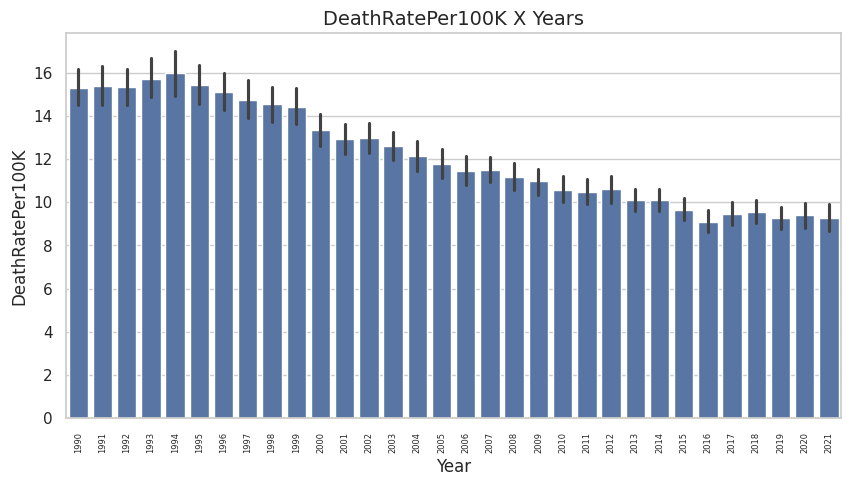

In [35]:
# Tasa de mortalidad por cada 100.000 habitantes X Año - Global
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x = 'Year', y = 'DeathRatePer100K')
plt.title("DeathRatePer100K X Years", fontsize = 14)
plt.xticks(rotation=90, fontsize = 6)
plt.show()

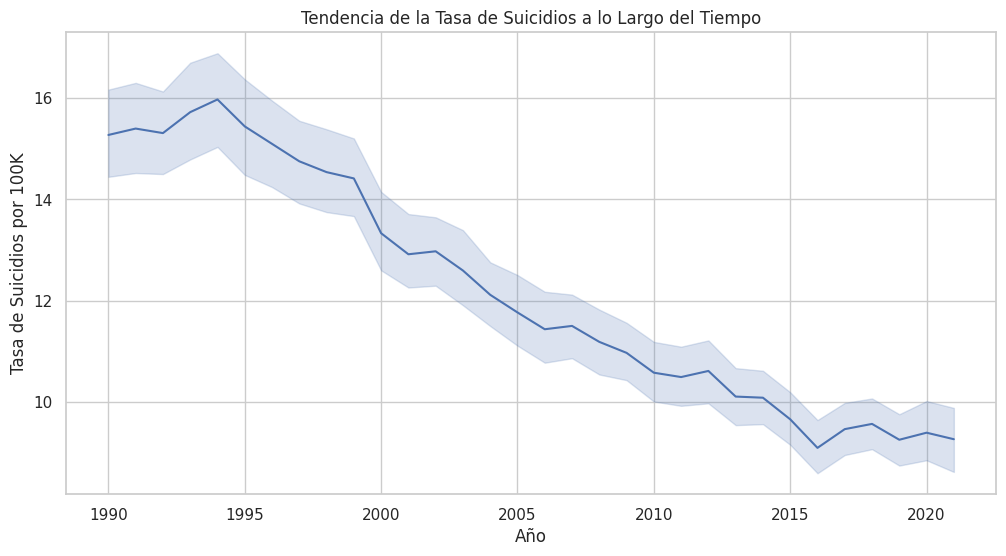

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='DeathRatePer100K', data=df)
plt.title('Tendencia de la Tasa de Suicidios a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Tasa de Suicidios por 100K')
plt.show()

Gracias a los datos, se aprecia una tendencia a la baja en el número de suicidios mientras más avanza el tiempo. Esto se debe confirmar con el modelo de predicción o mientras desarrollemos el proyecto.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

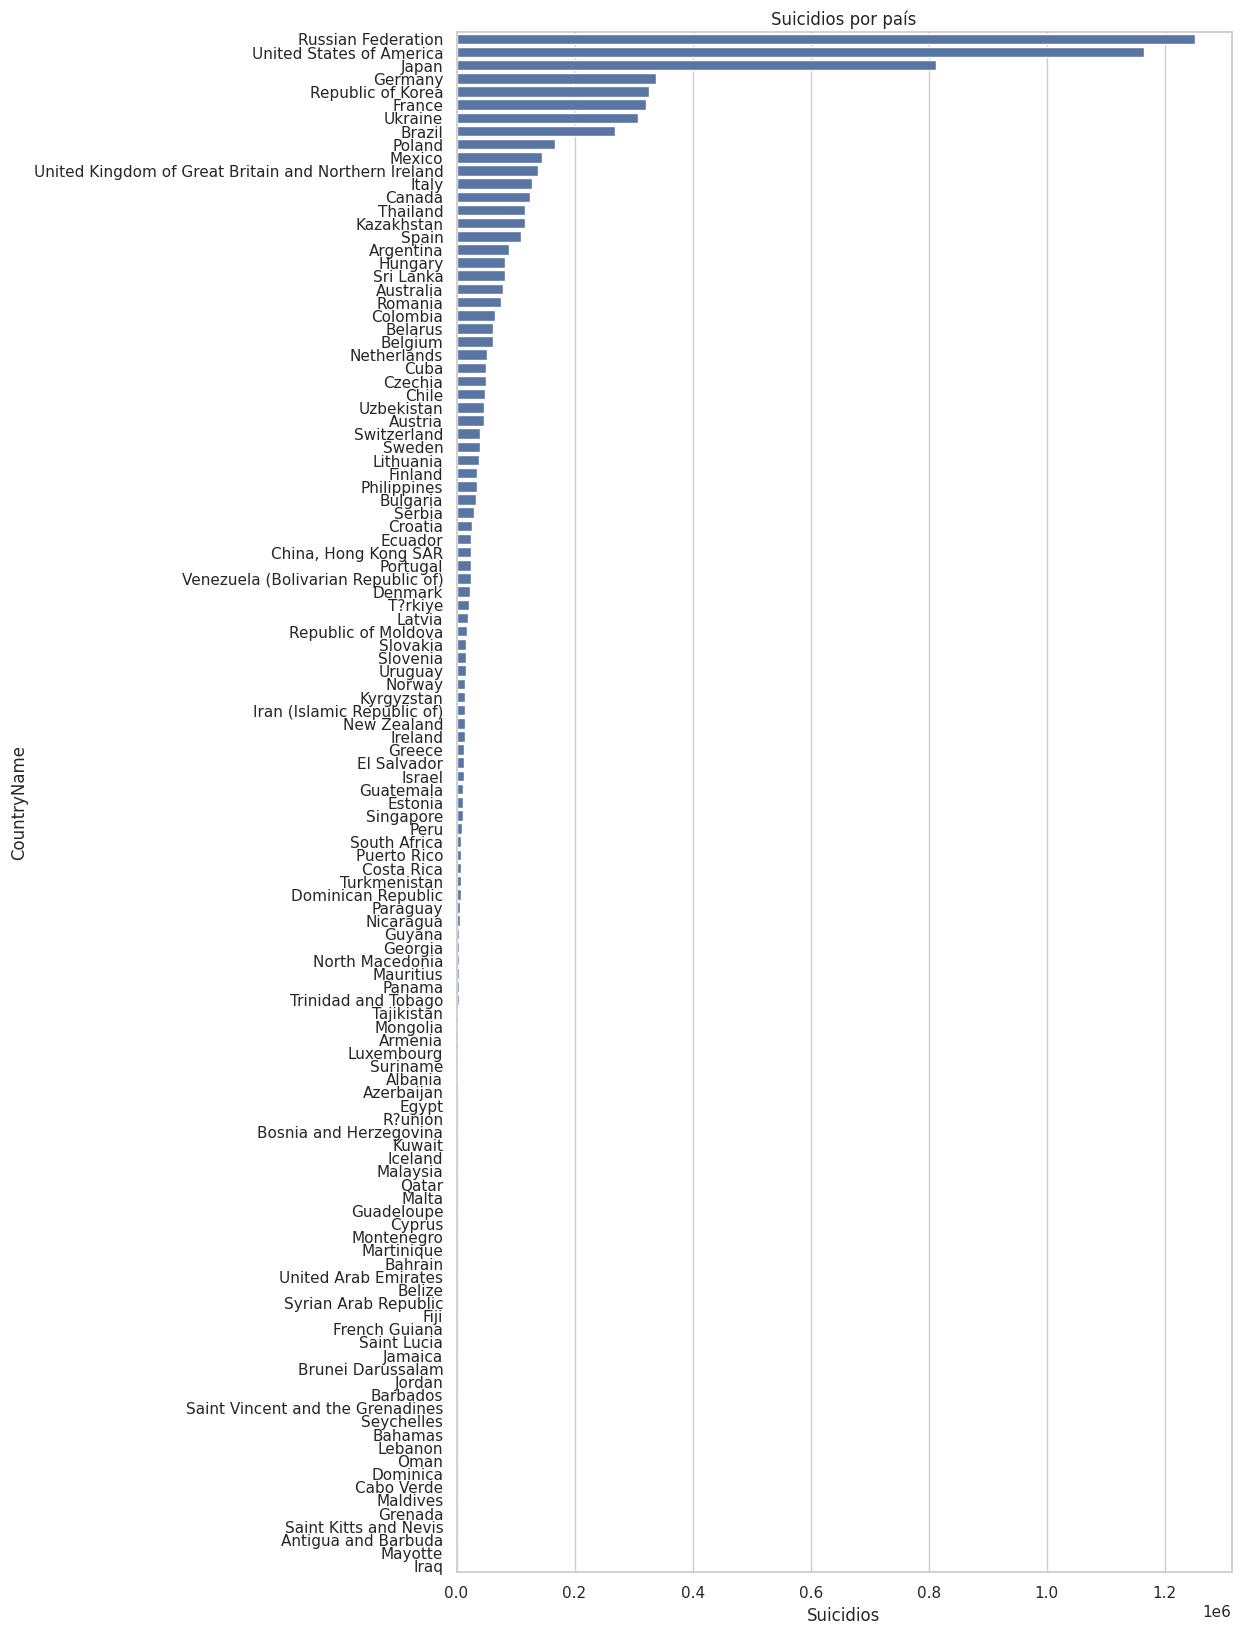

In [37]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por país y sumar los suicidios
suicide_counts = df.groupby('CountryName')['SuicideCount'].sum().reset_index()

# Ordenar por número de suicidios en orden descendente
suicide_counts = suicide_counts.sort_values(by='SuicideCount', ascending=False)

# Gráfico
plt.figure(figsize=(10, 20))

sns.barplot(y='CountryName', x='SuicideCount', data=suicide_counts)
plt.title('Suicidios por país')
plt.xlabel('Suicidios')
plt

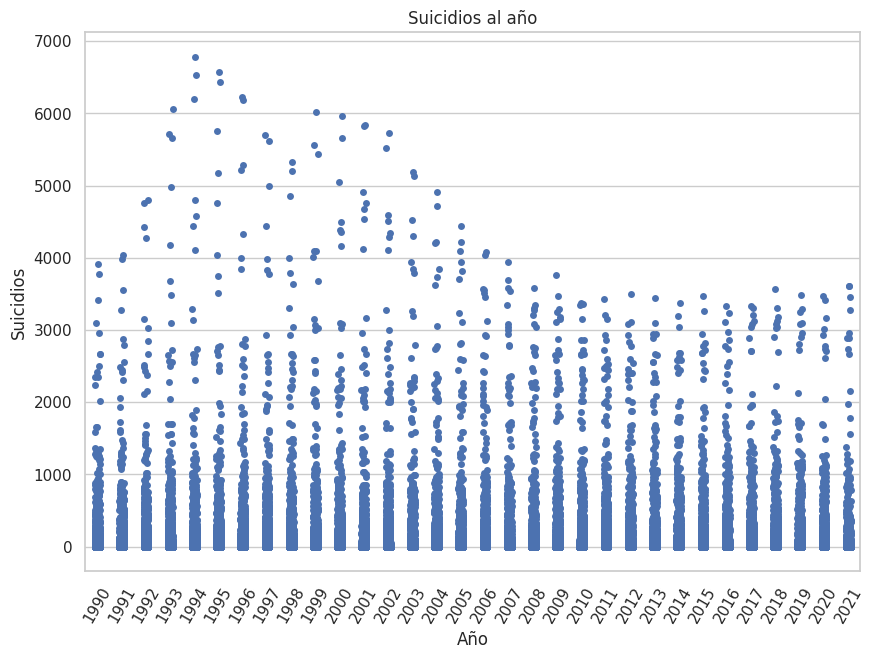

In [38]:
plt.figure(figsize=(10,7))
sns.stripplot(x="Year", y='SuicideCount', data=df)
plt.title('Suicidios al año')
plt.xlabel('Año')
plt.ylabel('Suicidios')
plt.xticks(rotation=60)
plt.show()

### Analisis por país

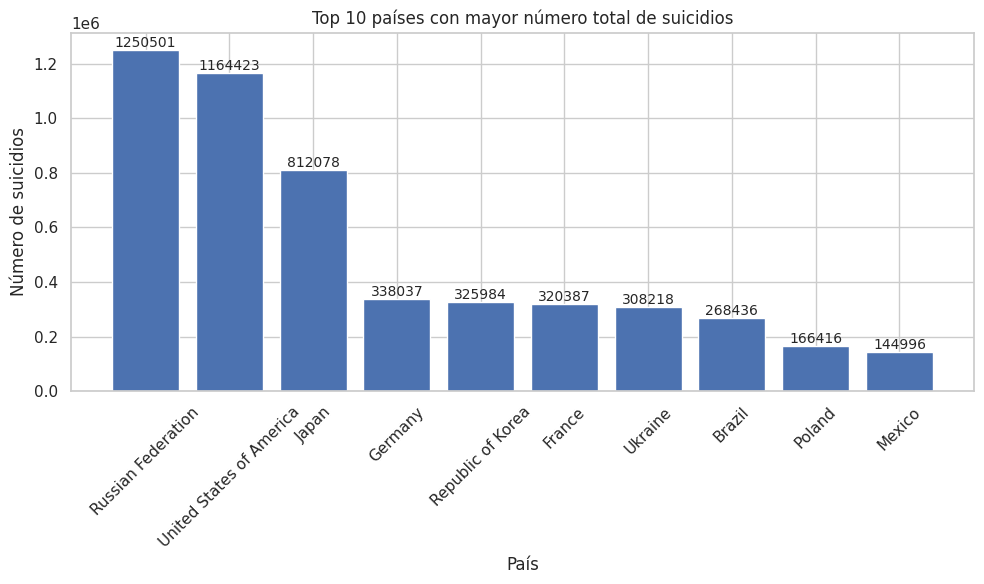

In [39]:
import matplotlib.pyplot as plt
# Agrupar y sumar suicidios por país
suicidios_por_pais = df.groupby('CountryName')['SuicideCount'].sum()
# Ordenar países de mayor a menor suicidio para top 10 con más suicidios
top10_mas = suicidios_por_pais.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_mas.index, top10_mas.values)
plt.xticks(rotation=45)
plt.title('Top 10 países con mayor número total de suicidios')
plt.ylabel('Número de suicidios')
plt.xlabel('País')
# Mostrar el valor numérico encima de cada barra para mayor claridad
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura + 1,
             f'{int(altura)}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

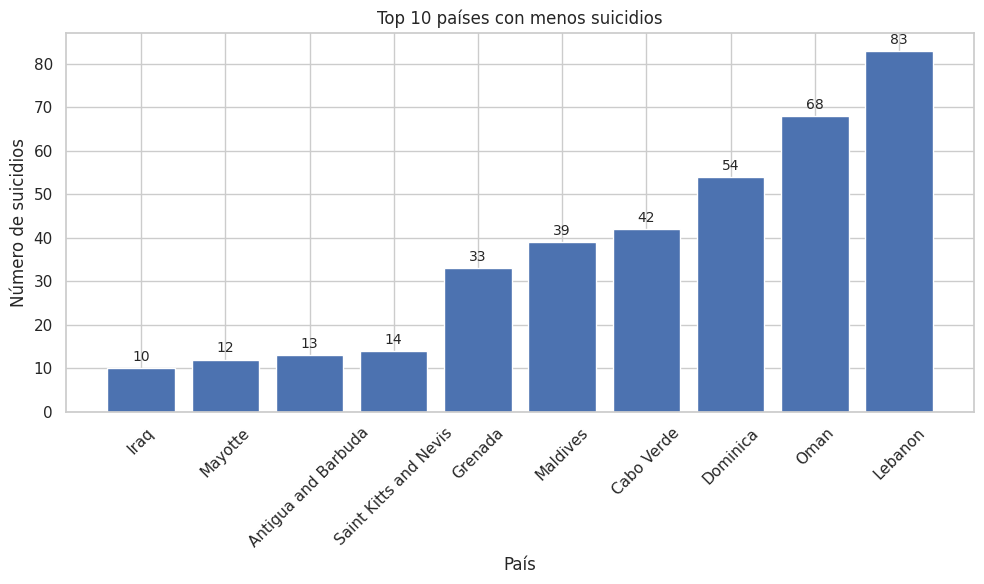

In [40]:
import matplotlib.pyplot as plt

# Agrupar y sumar suicidios por país
suicidios_por_pais = df.groupby('CountryName')['SuicideCount'].sum()
# Ordenar países de menor a mayor suicidio para top 10 con menos suicidios
top10_menos = suicidios_por_pais.sort_values(ascending=True).head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_menos.index, top10_menos.values)
# Rotar etiquetas del eje x para mejorar legibilidad
plt.xticks(rotation=45)
plt.title('Top 10 países con menos suicidios')
plt.ylabel('Número de suicidios')
plt.xlabel('País')
# Mostrar valor encima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 1,
             f'{int(altura)}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### Analisis por sexo

In [41]:
# Agrupar por sexo y sumar total de suicidios por grupo
total_suicidios_por_sexo = df.groupby('Sex')['SuicideCount'].sum()
print(total_suicidios_por_sexo)


Sex
Female    1706334.0
Male      5777072.0
Name: SuicideCount, dtype: float64


In [42]:
print("Estadísticas de Sucidios por Sexo:")
print(df.groupby('Sex')['SuicideCount'].agg(['mean', 'median', lambda x: x.mode()[0] if not x.mode().empty else 'N/A']))

Estadísticas de Sucidios por Sexo:
              mean  median  <lambda_0>
Sex                                   
Female   31.077369     3.0         0.0
Male    105.217499    11.0         0.0


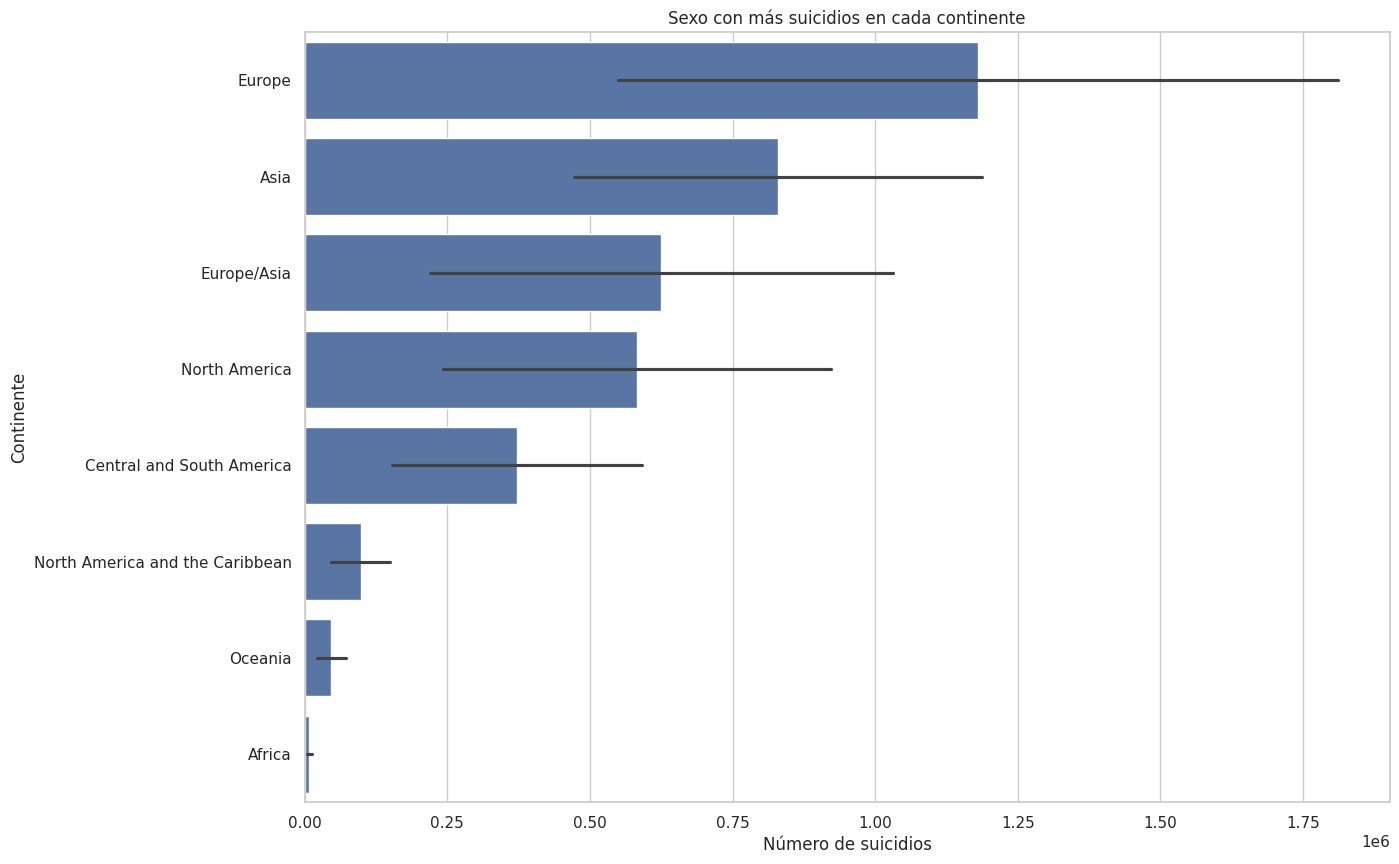

In [43]:
# Agrupar datos por continente y sexo
suicide_by_gender_country = df.groupby(['RegionName', 'Sex'])['SuicideCount'].sum().reset_index()
suicide_by_gender_country = suicide_by_gender_country.sort_values(by='SuicideCount', ascending=False)

# Graficar
plt.figure(figsize=(14, 10))
sns.barplot(
    data=suicide_by_gender_country,
    x='SuicideCount',
    y='RegionName'
)

plt.title('Sexo con más suicidios en cada continente')
plt.ylabel('Continente')
plt.xlabel('Número de suicidios')
plt.show()


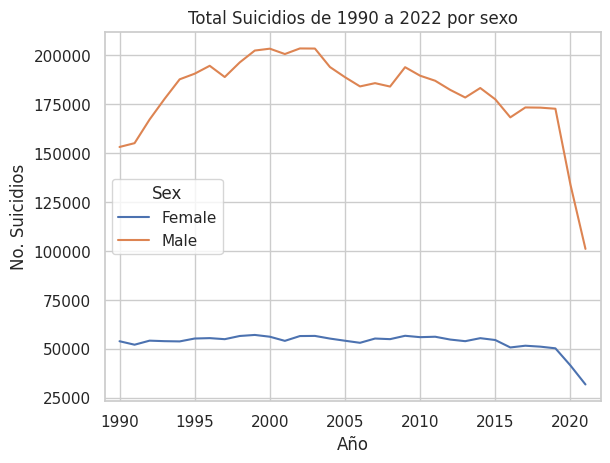

In [44]:
# Gráfica de muertes totales.
df.pivot_table ('SuicideCount', index='Year', columns='Sex', aggfunc='sum').plot()
plt.title('Total Suicidios de 1990 a 2022 por sexo')
plt.ylabel('No. Suicidios')
plt.xlabel('Año')
plt.xlim((df.Year.min() - 1), (df.Year.max() + 1))
plt.show()

Diferencia de Género: La distribución de suicidios es mayor y más variable entre los hombres que entre las mujeres, lo que puede reflejar una tendencia global observada en muchos estudios que sugieren que los hombres tienen una tasa de suicidio más alta.
* Variabilidad: Los hombres no solo tienen un número mayor de suicidios, sino que la variabilidad es mucho mayor, lo que puede indicar que los suicidios en hombres son más sensibles a diversos factores que afectan su distribución.

### Analisis por Generación Etaria

In [45]:
import plotly.express as px

generation_suicide_rates = (
    df.groupby('Generation')['DeathRatePer100K'].mean()
    .reset_index()
    .sort_values('DeathRatePer100K', ascending=False)  # Orden descendente
)

fig = px.bar(
    generation_suicide_rates,
    x='Generation',
    y='DeathRatePer100K',
    title='Tasa de Suicidios X Generación Etaria',
    labels={'Generation': 'Generación Etaria', 'DeathRatePer100K': 'Tasa Suicidio por cada 100k Habitantes'}
)

fig.update_layout(
    showlegend=False
)

fig.show()



In [46]:
grouped_data = df.groupby(['AgeGroup', 'Sex'])['DeathRatePer100K'].mean().unstack()

fig = px.bar(grouped_data, title='Suicide Rates by Age Group and Gender',
             labels={
                 'AgeGroup': 'Age Group',
                 'DeathRatePer100K': 'Suicide Rate per 100K Population',
                 'Sex': 'Gender'},
             )

fig.update_layout(
    title='Tasa de Suicidios por Grupo Etario y Sexo',
    xaxis_title='Grupo Etario',
    yaxis_title='Tasa Suicidio por cada 100k Habitantes',
    legend_title='Genero'
)

fig.show()



*   La generación "silenciosa" (personas nacidas entre aproximadamente 1928 y 1945) tiene la tasa de suicidios más alta, mientras que la generación alfa tiene la más baja.
*   Los grupos de edad de 55 a 74 años y de 75 años o más tienen las tasas de suicidio más altas.
*   En conclusión, los mayores indicadores de peligro de suicidio son A) Ser hombre, y B) tener más de 55 años.





###Analisis por Continente

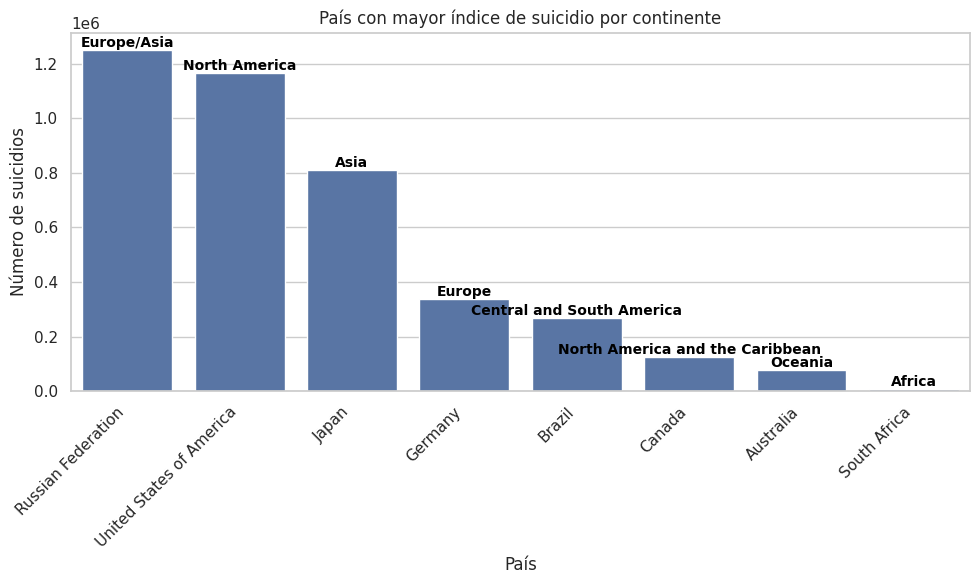

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar datos por país y continente
suicide_by_country_continent = df.groupby(['CountryName', 'RegionName'])['SuicideCount'].sum().reset_index()

# Encontrar el país con mayor índice de suicidio por continente
max_suicides_per_continent = suicide_by_country_continent.loc[
    suicide_by_country_continent.groupby('RegionName')['SuicideCount'].idxmax()
].reset_index(drop=True)

# Ordenar para mejor visualización
max_suicides_per_continent = max_suicides_per_continent.sort_values(by='SuicideCount', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=max_suicides_per_continent,
    x='CountryName',
    y='SuicideCount'
)

plt.xticks(rotation=45, ha='right')
plt.title('País con mayor índice de suicidio por continente')
plt.ylabel('Número de suicidios')
plt.xlabel('País')

# Añadir etiqueta de continente sobre cada barra
for i, bar in enumerate(ax.patches):
    altura = bar.get_height()
    continente = max_suicides_per_continent.loc[i, 'RegionName']
    # Colocar texto centrado horizontalmente sobre la barra y algo encima de ella
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura,
        continente,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        weight='semibold'
    )

plt.tight_layout()
plt.show()

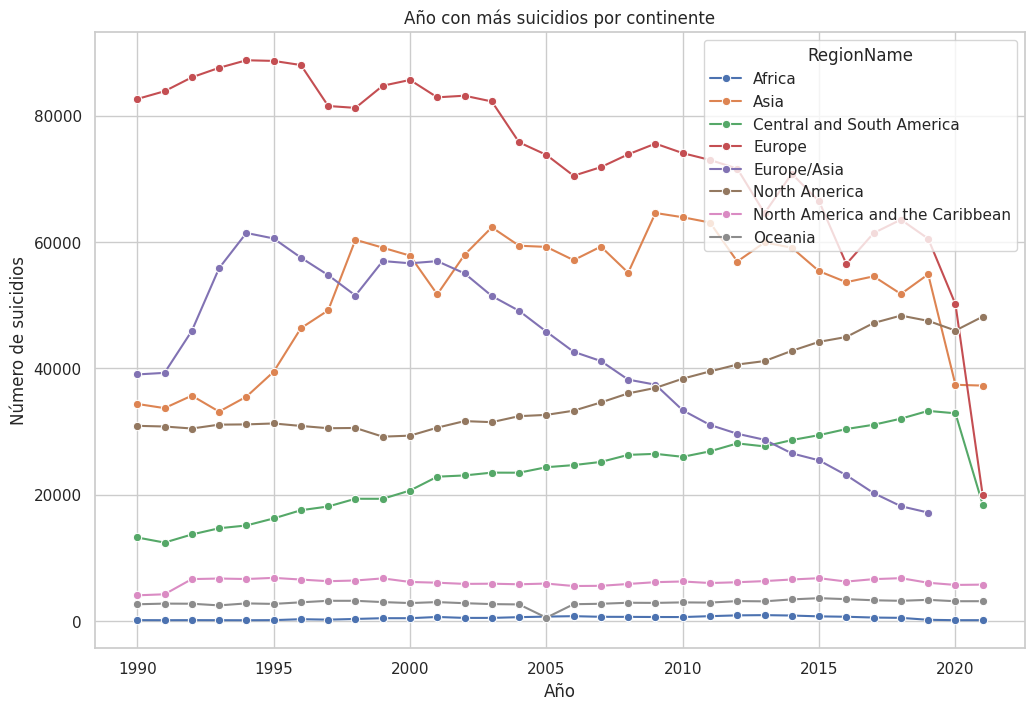

In [48]:
# Agrupar datos por año y continente
suicide_by_year_continent = df.groupby(['Year', 'RegionName'])['SuicideCount'].sum().reset_index()
# Graficar
plt.figure(figsize=(12, 8))
sns.lineplot(data=suicide_by_year_continent, x='Year', y='SuicideCount', hue='RegionName', marker='o')
plt.title('Año con más suicidios por continente')
plt.ylabel('Número de suicidios')
plt.xlabel('Año')
plt.show()

#5.-Relaciones / Correlaciones




Correlación con SuicideCount:
SuicideCount                    1.000000
Population                      0.524855
GDP                             0.456495
GrossNationalIncome             0.455907
DeathRatePer100K                0.267912
CauseSpecificDeathPercentage    0.151385
GDPPerCapita                    0.076903
GNIPerCapita                    0.053162
InflationRate                   0.029435
EmploymentPopulationRatio       0.027791
Year                           -0.014341
Name: SuicideCount, dtype: float64


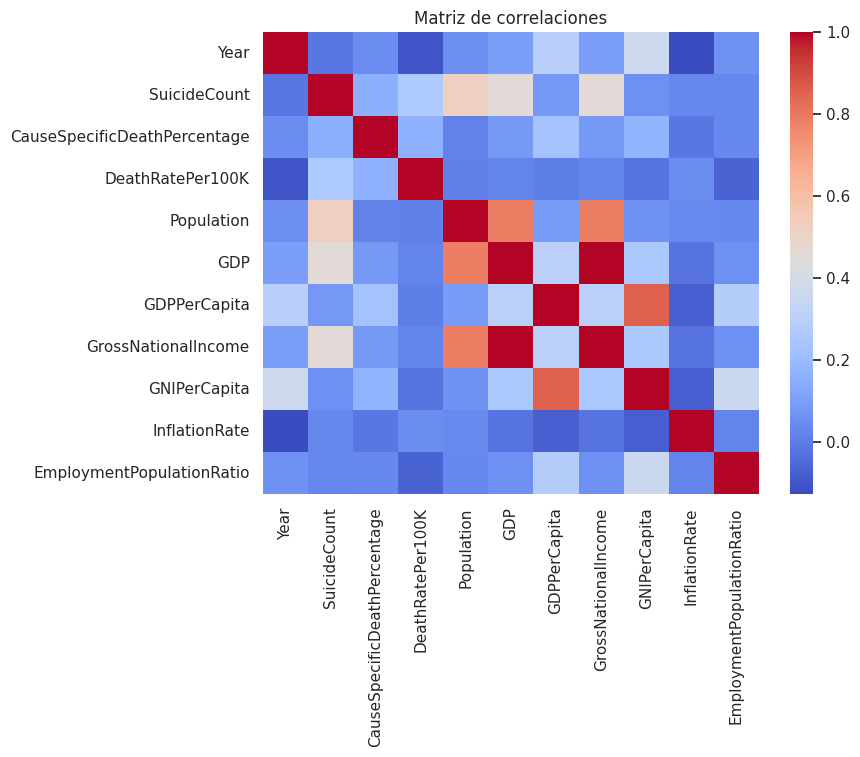

In [49]:
df_numeric = df.select_dtypes(include=np.number)
corr = df_numeric.corr()['SuicideCount'].sort_values(ascending=False)
print("\nCorrelación con SuicideCount:")
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=False, cmap='coolwarm')
plt.title("Matriz de correlaciones")
plt.show()

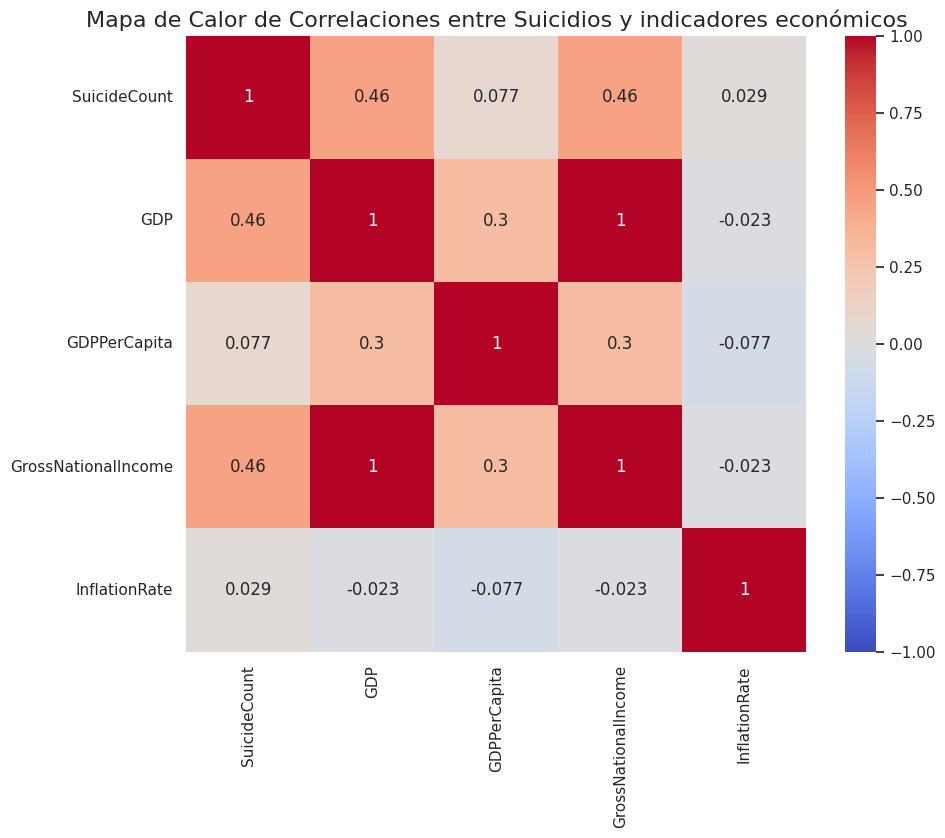

In [50]:
# Seleccionar las columnas relevantes y calcular la correlación
correlation_matrix = df[['SuicideCount', 'GDP', 'GDPPerCapita', 'GrossNationalIncome','InflationRate']].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Mapa de Calor de Correlaciones entre Suicidios y indicadores económicos', fontsize=16)
plt.show()

La mayoría de los coeficientes de correlación son bastante pequeños, situándose entre -0,06 y 0,06. Por lo general, las correlaciones inferiores a 0,3 o superiores a -0,3 se consideran correlaciones débiles o insignificantes.

*   La correlación negativa más fuerte es de alrededor de -0,06 para la tasa de empleo, lo que sugiere una relación negativa muy débil entre un mayor empleo y un menor número de suicidios.
* La correlación positiva más fuerte es de alrededor de 0,06 para la tasa de inflación, lo que indica una relación positiva muy débil entre una mayor inflación y un mayor número de suicidios.
* Todos los demás factores económicos, como el PIB, el PIB per cápita, el INB per cápita y la renta nacional bruta,  muestran correlaciones aún más débiles, con coeficientes que rondan el 0.

En resumen, aunque las direcciones de las correlaciones coinciden con las relaciones esperadas (por ejemplo, mayores ingresos asociados a menores suicidios), la fuerza real de estas correlaciones con las cifras de suicidios es muy débil o insignificante según esta visualización de datos. No parece haber ninguna correlación positiva o negativa fuerte entre los factores económicos enumerados y las tasas de suicidio.

# 6.- Detección Outlier (valores atípicos)



In [51]:
# Detección Outlier
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Outliers for column '{col}':")
    display(outliers)
    print("-" * 30)

Outliers for column 'Year':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio


------------------------------
Outliers for column 'SuicideCount':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
765,Central and South America,Argentina,1991,Male,15-24 years,Generation Z,107.0,6.461353,8.445146,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,3.038888,56.747
766,Central and South America,Argentina,1991,Male,25-34 years,Millennials,107.0,6.213705,9.067797,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,3.038888,56.747
767,Central and South America,Argentina,1991,Male,25-34 years,Millennials,107.0,5.578728,9.753874,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,3.038888,56.747
768,Central and South America,Argentina,1991,Male,35-54 years,Generation X,99.0,3.967936,9.510086,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,3.038888,56.747
769,Central and South America,Argentina,1991,Male,35-54 years,Generation X,96.0,2.581339,9.948187,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,3.038888,56.747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118554,North America,United States of America,2021,Female,55-74 years,Baby Boomers,584.0,0.433183,6.127282,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118555,North America,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,North America,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,North America,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


------------------------------
Outliers for column 'CauseSpecificDeathPercentage':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
145,Europe,Albania,1995,Female,15-24 years,Generation Z,9.0,12.328767,6.696429,3187784.0,2.392765e+09,750.604449,2.035220e+09,2710.0,7.793219,53.186
185,Europe,Albania,1996,Female,15-24 years,Generation Z,9.0,14.754098,6.598240,3168033.0,3.199641e+09,1009.977111,2.823912e+09,3050.0,12.725478,53.039
223,Europe,Albania,1997,Female,0-14 years,Generation Alpha,6.0,14.285714,3.462204,3148281.0,2.258514e+09,717.380048,2.532886e+09,2780.0,33.180274,51.873
224,Europe,Albania,1997,Female,15-24 years,Generation Z,10.0,11.627907,6.468305,3148281.0,2.258514e+09,717.380048,2.532886e+09,2780.0,33.180274,51.873
225,Europe,Albania,1997,Female,15-24 years,Generation Z,11.0,13.253012,7.890961,3148281.0,2.258514e+09,717.380048,2.532886e+09,2780.0,33.180274,51.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118524,North America,United States of America,2021,Male,15-24 years,Generation Z,1780.0,18.342951,16.353550,332031554.0,2.331510e+13,70219.472450,2.370530e+13,71130.0,4.697859,57.946
118525,North America,United States of America,2021,Male,15-24 years,Generation Z,3463.0,19.020157,30.787570,332031554.0,2.331510e+13,70219.472450,2.370530e+13,71130.0,4.697859,57.946
118526,North America,United States of America,2021,Male,25-34 years,Millennials,3607.0,14.204702,29.791493,332031554.0,2.331510e+13,70219.472450,2.370530e+13,71130.0,4.697859,57.946
118543,North America,United States of America,2021,Female,0-14 years,Generation Alpha,241.0,16.620690,2.343477,332031554.0,2.331510e+13,70219.472450,2.370530e+13,71130.0,4.697859,57.946


------------------------------
Outliers for column 'DeathRatePer100K':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
618,Europe,Albania,2007,Male,75+ years,Silent Generation,4.0,0.360685,65.649106,2970017.0,1.067732e+10,3595.038295,1.027425e+10,7490.0,2.932682,45.606
776,Central and South America,Argentina,1991,Male,75+ years,Silent Generation,89.0,0.513857,38.362069,33105763.0,1.897200e+11,5730.723810,1.278050e+11,7740.0,3.038888,56.747
777,Central and South America,Argentina,1991,Male,75+ years,Silent Generation,58.0,0.400304,57.425743,33105763.0,1.897200e+11,5730.723810,1.278050e+11,7740.0,3.038888,56.747
778,Central and South America,Argentina,1991,Male,75+ years,Silent Generation,37.0,0.285472,58.730159,33105763.0,1.897200e+11,5730.723810,1.278050e+11,7740.0,3.038888,56.747
817,Central and South America,Argentina,1992,Male,75+ years,Silent Generation,61.0,0.403920,58.597502,33568285.0,2.287790e+11,6815.329330,2.035680e+11,8540.0,3.038888,56.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118298,Europe,Slovakia,2020,Male,75+ years,Silent Generation,11.0,0.241758,45.778018,5458827.0,1.067310e+11,19552.091110,1.050830e+11,32640.0,1.936941,55.073
118378,Europe,Sweden,2021,Male,75+ years,Silent Generation,43.0,0.273694,44.530514,10415811.0,6.397150e+11,61417.680880,6.322710e+11,62780.0,2.163197,60.053
118418,Europe,Sweden,2020,Male,75+ years,Silent Generation,42.0,0.242047,44.388079,10353442.0,5.470540e+11,52837.903980,5.676220e+11,58180.0,0.497367,59.977
118537,North America,United States of America,2021,Male,75+ years,Silent Generation,1180.0,0.556226,40.998017,332031554.0,2.331510e+13,70219.472450,2.370530e+13,71130.0,4.697859,57.946


------------------------------
Outliers for column 'Population':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
11780,Central and South America,Brazil,1991,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,153336445.0,4.073380e+11,2656.497207,4.347000e+11,6640.0,432.786662,59.651
11781,Central and South America,Brazil,1991,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,153336445.0,4.073380e+11,2656.497207,4.347000e+11,6640.0,432.786662,59.651
11782,Central and South America,Brazil,1991,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,153336445.0,4.073380e+11,2656.497207,4.347000e+11,6640.0,432.786662,59.651
11783,Central and South America,Brazil,1991,Male,0-14 years,Generation Alpha,41.0,0.944918,0.480132,153336445.0,4.073380e+11,2656.497207,4.347000e+11,6640.0,432.786662,59.651
11784,Central and South America,Brazil,1991,Male,15-24 years,Generation Z,263.0,2.203787,3.463333,153336445.0,4.073380e+11,2656.497207,4.347000e+11,6640.0,432.786662,59.651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118554,North America,United States of America,2021,Female,55-74 years,Baby Boomers,584.0,0.433183,6.127282,332031554.0,2.331510e+13,70219.472450,2.370530e+13,71130.0,4.697859,57.946
118555,North America,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.472450,2.370530e+13,71130.0,4.697859,57.946
118556,North America,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.472450,2.370530e+13,71130.0,4.697859,57.946
118557,North America,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.472450,2.370530e+13,71130.0,4.697859,57.946


------------------------------
Outliers for column 'GDP':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
3480,Oceania,Australia,2006,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
3481,Oceania,Australia,2006,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
3482,Oceania,Australia,2006,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
3483,Oceania,Australia,2006,Male,0-14 years,Generation Alpha,7.0,7.777778,0.973198,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
3484,Oceania,Australia,2006,Male,15-24 years,Generation Z,81.0,21.774194,11.309690,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118554,North America,United States of America,2021,Female,55-74 years,Baby Boomers,584.0,0.433183,6.127282,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118555,North America,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,North America,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,North America,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


------------------------------
Outliers for column 'GDPPerCapita':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
3680,Oceania,Australia,2011,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,22340024.0,1.398700e+12,62609.66072,1.126190e+12,40340.0,3.303850,62.116
3681,Oceania,Australia,2011,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,22340024.0,1.398700e+12,62609.66072,1.126190e+12,40340.0,3.303850,62.116
3682,Oceania,Australia,2011,Male,0-14 years,Generation Alpha,1.0,1.204819,0.140409,22340024.0,1.398700e+12,62609.66072,1.126190e+12,40340.0,3.303850,62.116
3683,Oceania,Australia,2011,Male,0-14 years,Generation Alpha,6.0,8.219178,0.843238,22340024.0,1.398700e+12,62609.66072,1.126190e+12,40340.0,3.303850,62.116
3684,Oceania,Australia,2011,Male,15-24 years,Generation Z,81.0,26.129032,10.849197,22340024.0,1.398700e+12,62609.66072,1.126190e+12,40340.0,3.303850,62.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118554,North America,United States of America,2021,Female,55-74 years,Baby Boomers,584.0,0.433183,6.127282,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118555,North America,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,North America,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,North America,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


------------------------------
Outliers for column 'GrossNationalIncome':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
3480,Oceania,Australia,2006,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
3481,Oceania,Australia,2006,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
3482,Oceania,Australia,2006,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
3483,Oceania,Australia,2006,Male,0-14 years,Generation Alpha,7.0,7.777778,0.973198,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
3484,Oceania,Australia,2006,Male,15-24 years,Generation Z,81.0,21.774194,11.309690,20450966.0,7.484180e+11,36595.70715,7.076540e+11,33490.0,3.555288,61.677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118554,North America,United States of America,2021,Female,55-74 years,Baby Boomers,584.0,0.433183,6.127282,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118555,North America,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,North America,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,North America,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


------------------------------
Outliers for column 'GNIPerCapita':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
13000,Asia,Brunei Darussalam,1996,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,306196.0,5.115454e+09,16706.46935,4.938444e+09,65180.0,1.996137,63.339
13001,Asia,Brunei Darussalam,1996,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,306196.0,5.115454e+09,16706.46935,4.938444e+09,65180.0,1.996137,63.339
13002,Asia,Brunei Darussalam,1996,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,306196.0,5.115454e+09,16706.46935,4.938444e+09,65180.0,1.996137,63.339
13003,Asia,Brunei Darussalam,1996,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,306196.0,5.115454e+09,16706.46935,4.938444e+09,65180.0,1.996137,63.339
13004,Asia,Brunei Darussalam,1996,Male,15-24 years,Generation Z,1.0,5.555556,7.178751,306196.0,5.115454e+09,16706.46935,4.938444e+09,65180.0,1.996137,63.339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118554,North America,United States of America,2021,Female,55-74 years,Baby Boomers,584.0,0.433183,6.127282,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118555,North America,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,North America,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,North America,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


------------------------------
Outliers for column 'InflationRate':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,Europe,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
1,Europe,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
2,Europe,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
3,Europe,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
4,Europe,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115474,Central and South America,Venezuela (Bolivarian Republic of),2015,Female,55-74 years,Baby Boomers,5.0,0.091946,1.296052,30529716.0,6.391870e+10,9659.33890,6.002684e+10,16100.0,121.738085,57.914
115475,Central and South America,Venezuela (Bolivarian Republic of),2015,Female,55-74 years,Baby Boomers,2.0,0.035606,0.728810,30529716.0,6.391870e+10,9659.33890,6.002684e+10,16100.0,121.738085,57.914
115476,Central and South America,Venezuela (Bolivarian Republic of),2015,Female,75+ years,Silent Generation,2.0,0.029214,1.084875,30529716.0,6.391870e+10,9659.33890,6.002684e+10,16100.0,121.738085,57.914
115477,Central and South America,Venezuela (Bolivarian Republic of),2015,Female,75+ years,Silent Generation,1.0,0.013512,0.869701,30529716.0,6.391870e+10,9659.33890,6.002684e+10,16100.0,121.738085,57.914


------------------------------
Outliers for column 'EmploymentPopulationRatio':


,RegionName,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
4960,Asia,Azerbaijan,1995,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,7684850.0,2.417331e+09,314.558019,1.391519e+09,2310.0,411.759642,73.276
4961,Asia,Azerbaijan,1995,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,7684850.0,2.417331e+09,314.558019,1.391519e+09,2310.0,411.759642,73.276
4962,Asia,Azerbaijan,1995,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,7684850.0,2.417331e+09,314.558019,1.391519e+09,2310.0,411.759642,73.276
4963,Asia,Azerbaijan,1995,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,7684850.0,2.417331e+09,314.558019,1.391519e+09,2310.0,411.759642,73.276
4964,Asia,Azerbaijan,1995,Male,15-24 years,Generation Z,4.0,0.856531,1.176471,7684850.0,2.417331e+09,314.558019,1.391519e+09,2310.0,411.759642,73.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118074,North America and the Caribbean,Puerto Rico,2021,Female,55-74 years,Baby Boomers,2.0,0.196078,2.104842,3262693.0,1.063690e+11,32601.565640,7.329263e+10,24800.0,3.038888,37.365
118075,North America and the Caribbean,Puerto Rico,2021,Female,55-74 years,Baby Boomers,1.0,0.068493,1.115300,3262693.0,1.063690e+11,32601.565640,7.329263e+10,24800.0,3.038888,37.365
118076,North America and the Caribbean,Puerto Rico,2021,Female,75+ years,Silent Generation,1.0,0.050684,1.460451,3262693.0,1.063690e+11,32601.565640,7.329263e+10,24800.0,3.038888,37.365
118077,North America and the Caribbean,Puerto Rico,2021,Female,75+ years,Silent Generation,0.0,0.000000,0.000000,3262693.0,1.063690e+11,32601.565640,7.329263e+10,24800.0,3.038888,37.365


------------------------------


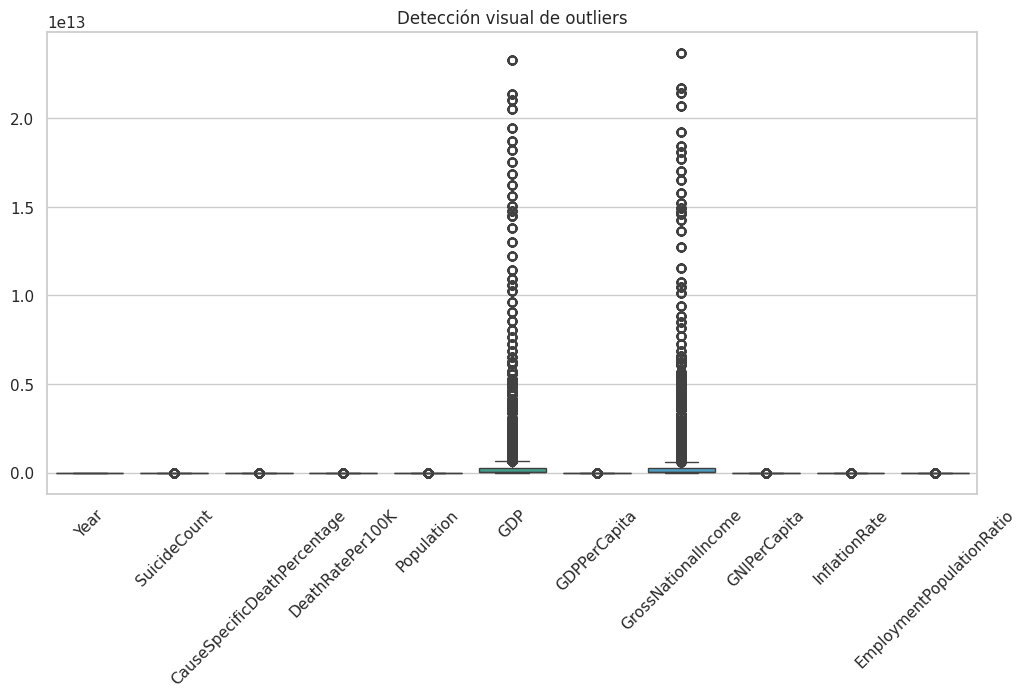

In [52]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Detección visual de outliers")
plt.show()

# Eliminamos outliers extremos en SuicideCount
q1 = df['SuicideCount'].quantile(0.25)
q3 = df['SuicideCount'].quantile(0.75)
iqr = q3 - q1
df = df[(df['SuicideCount'] >= q1 - 1.5*iqr) & (df['SuicideCount'] <= q3 + 1.5*iqr)]

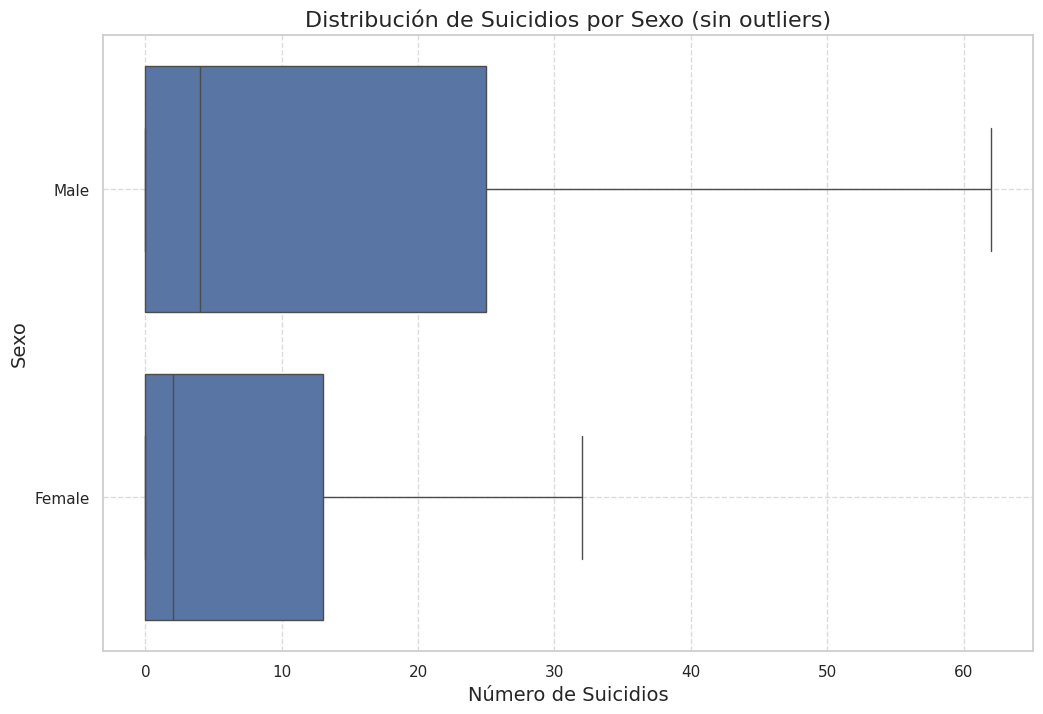

In [53]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df,
    x='SuicideCount',
    y='Sex',
    showfliers=False)

plt.title('Distribución de Suicidios por Sexo (sin outliers)', fontsize=16)
plt.xlabel('Número de Suicidios', fontsize=14)
plt.ylabel('Sexo', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

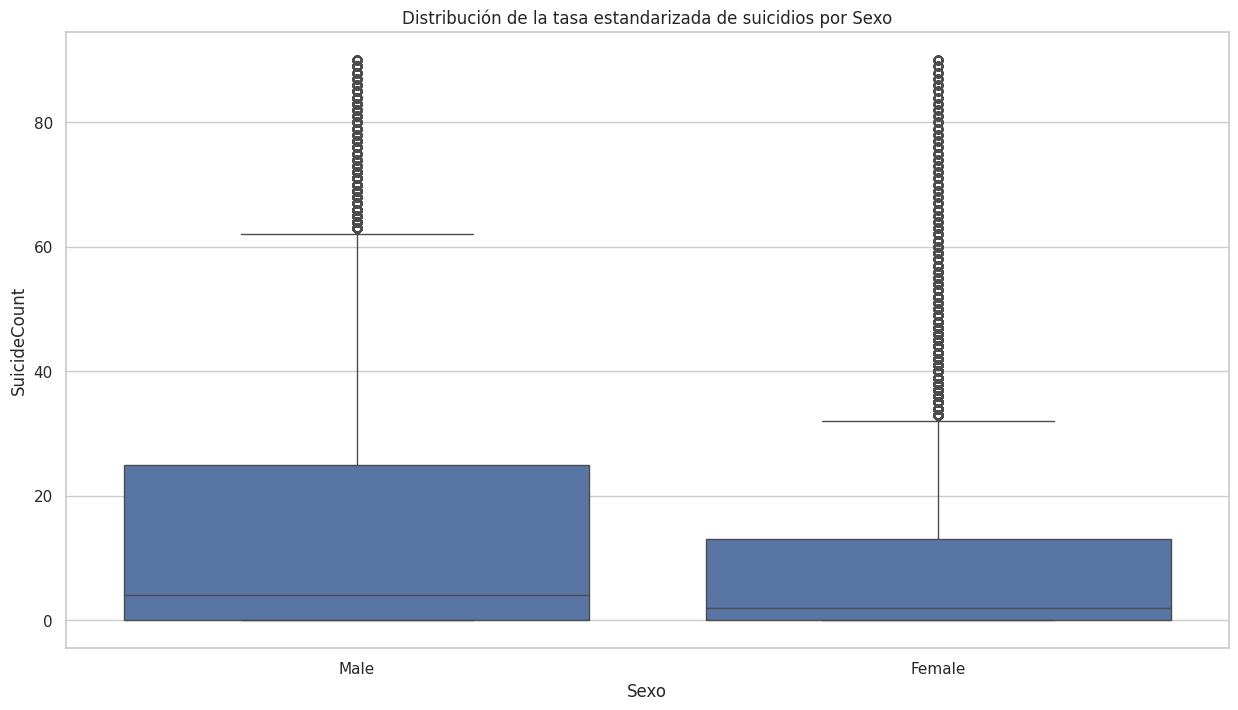

In [54]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(
    data=df,
    x='Sex',
    y='SuicideCount')
plt.title('Distribución de la tasa estandarizada de suicidios por Sexo')
plt.xlabel('Sexo')
plt.ylabel('SuicideCount')
plt.show()

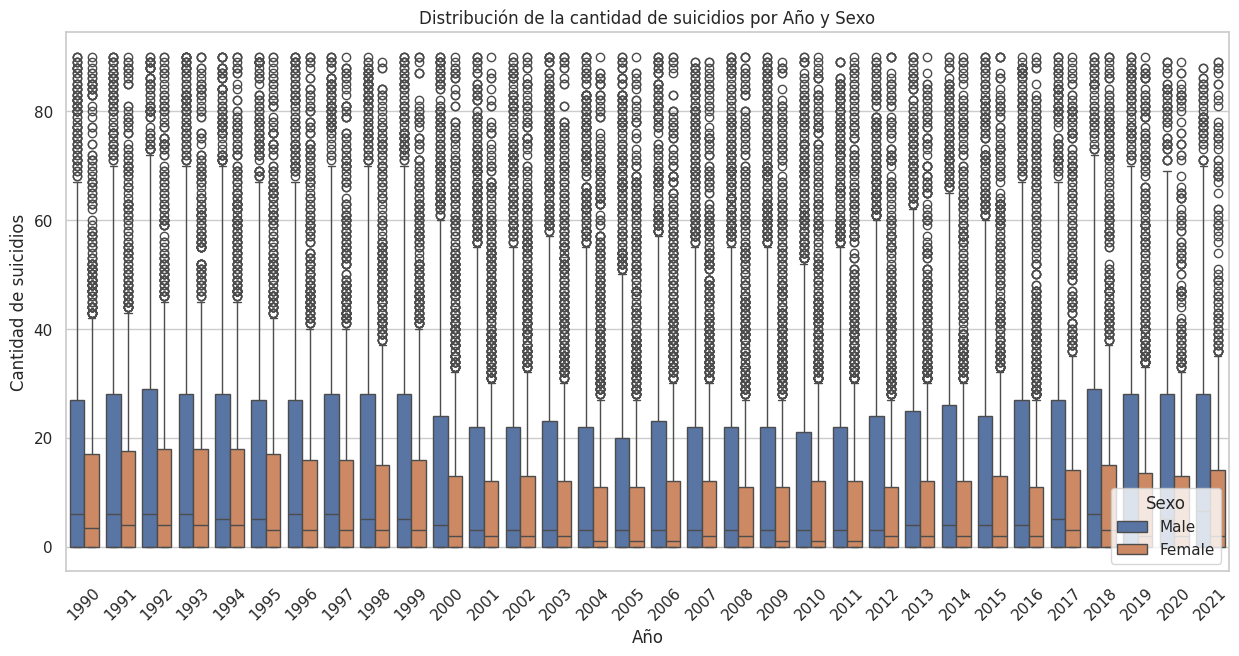

In [55]:
plt.figure(figsize=(15,7))
sns.boxplot(
    data=df,
    x='Year',
    y='SuicideCount',
    hue='Sex')
plt.title('Distribución de la cantidad de suicidios por Año y Sexo')
plt.xlabel('Año')
plt.ylabel('Cantidad de suicidios')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.show()


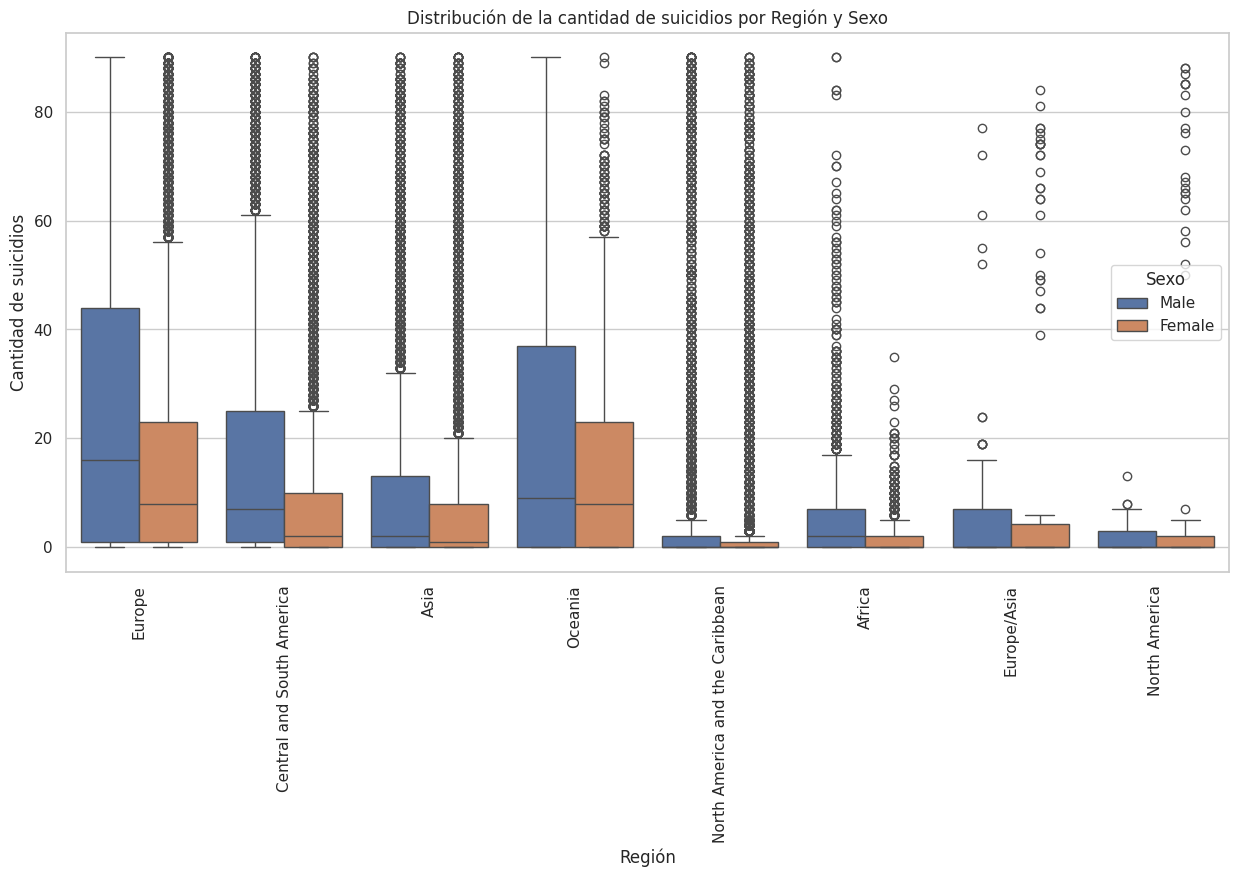

In [56]:
plt.figure(figsize=(15,7))
sns.boxplot(
    data=df,
    x='RegionName',
    y='SuicideCount',
    hue='Sex')
plt.title('Distribución de la cantidad de suicidios por Región y Sexo')
plt.xlabel('Región')
plt.ylabel('Cantidad de suicidios')
plt.legend(title='Sexo')
plt.xticks(rotation=90)
plt.show()


Las cifras arrojadas coinciden con la diferencia desigual de suicidios entre hombres y mujeres. Por otro lado, Europa y Oceanía tienen los valores de suicidios más altos para ambos sexos.

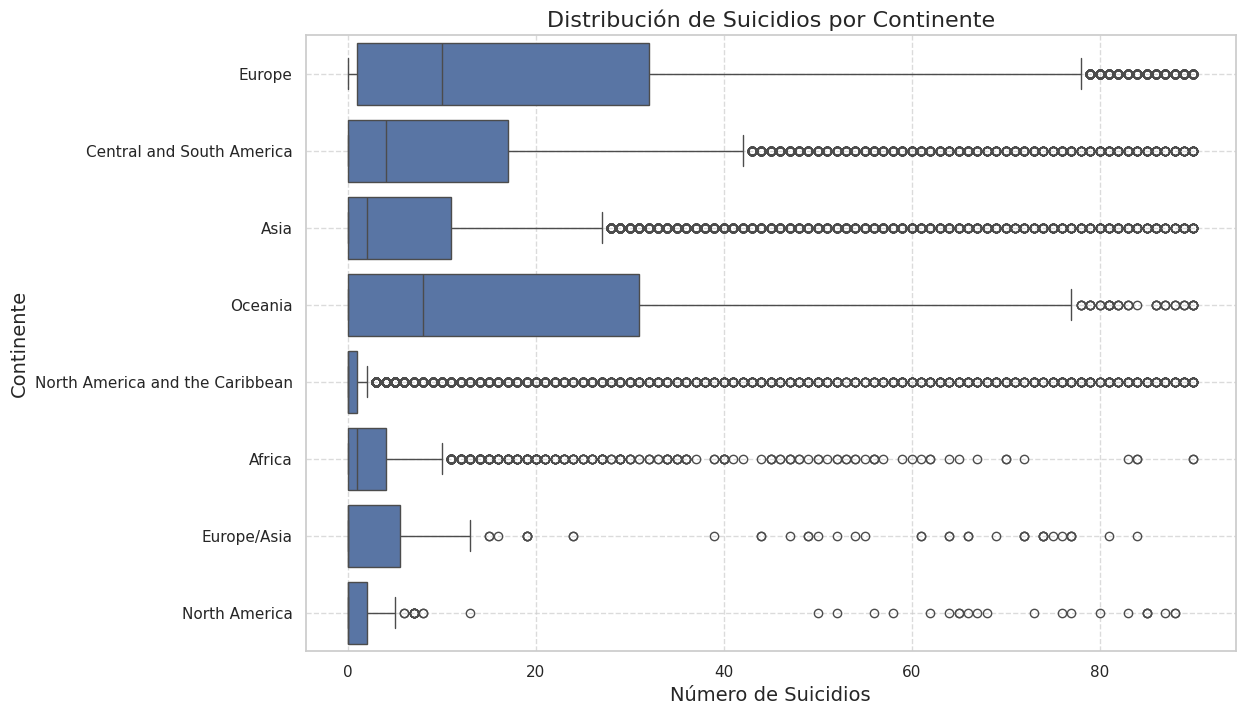

In [57]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='SuicideCount', y='RegionName')

plt.title('Distribución de Suicidios por Continente', fontsize=16)
plt.xlabel('Número de Suicidios', fontsize=14)
plt.ylabel('Continente', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Europa y Oceanía muestran los rangos más amplios, mientras que los extremos en todos los continentes pueden indicar situaciones inusuales o críticas en ciertos países/años.

# 8.- One-hot encoding (Números Binarios)

In [58]:
df_sample = pd.DataFrame({
    'Sex': ['Male', 'Female', 'Female', 'Male', 'Female']
})

# One-hot encoding para columna 'Sex'
df_sex_encoded = pd.get_dummies(df_sample['Sex'], prefix='Sex')

print(df_sex_encoded)


   Sex_Female  Sex_Male
0       False      True
1        True     False
2        True     False
3       False      True
4        True     False


In [59]:
df_sample = pd.DataFrame({
    'AgeGroup': ['15-24 years', '25-34 years', '15-24 years', '35-44 years']
})

# One-hot encoding para columna 'AgeGroup'
df_agegroup_encoded = pd.get_dummies(df_sample['AgeGroup'], prefix='AgeGroup')

print(df_agegroup_encoded)

   AgeGroup_15-24 years  AgeGroup_25-34 years  AgeGroup_35-44 years
0                  True                 False                 False
1                 False                  True                 False
2                  True                 False                 False
3                 False                 False                  True


In [60]:
# Ejemplo con columna Generation
df_sample = pd.DataFrame({
    'Generation': ['Millennials', 'Gen X', 'Millennials', 'Boomers']
})

# One-hot encoding para columna 'Generation'
df_generation_encoded = pd.get_dummies(df_sample['Generation'], prefix='Generation')

print(df_generation_encoded)

   Generation_Boomers  Generation_Gen X  Generation_Millennials
0               False             False                    True
1               False              True                   False
2               False             False                    True
3                True             False                   False


In [61]:
df_region_encoded = pd.get_dummies(df['RegionName'], prefix='RegionName')

# Mostrar el resultado
print(df_region_encoded.head())


   RegionName_Africa  RegionName_Asia  RegionName_Central and South America  \
0              False            False                                 False   
1              False            False                                 False   
2              False            False                                 False   
3              False            False                                 False   
4              False            False                                 False   

   RegionName_Europe  RegionName_Europe/Asia  RegionName_North America  \
0               True                   False                     False   
1               True                   False                     False   
2               True                   False                     False   
3               True                   False                     False   
4               True                   False                     False   

   RegionName_North America and the Caribbean  RegionName_Oceania  
0           

In [62]:
df_encoded_cat = pd.get_dummies(df[['Sex', 'AgeGroup', 'Generation']], drop_first=True)


# 9.- Modelo de predicción

df: DataFrame original con todos los datos crudos (Sex, AgeGroup, Generation, etc).

df_valid: Un subconjunto o versión filtrada del DataFrame con filas válidas, ahí está la columna DeathRatePer100K calculada y lista.

df_sample: DataFrame que usas para probar o hacer transformaciones de ejemplo, como one-hot encoding, antes de aplicarlo al dataset completo.

df_encoded (o df_coding): DataFrame que usarás para el modelado.

In [63]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'AgeGroup', 'Generation'], drop_first=True)

# Filtrar filas sin tasa para modelado
df_modeling = df_encoded.dropna(subset=['DeathRatePer100K']).copy()


In [64]:
print(df.columns)
print(df_valid.columns)


Index(['RegionName', 'CountryName', 'Year', 'Sex', 'AgeGroup', 'Generation',
       'SuicideCount', 'CauseSpecificDeathPercentage', 'DeathRatePer100K',
       'Population', 'GDP', 'GDPPerCapita', 'GrossNationalIncome',
       'GNIPerCapita', 'InflationRate', 'EmploymentPopulationRatio'],
      dtype='object')
Index(['RegionName', 'CountryName', 'Year', 'Sex', 'AgeGroup', 'Generation',
       'SuicideCount', 'CauseSpecificDeathPercentage', 'DeathRatePer100K',
       'Population', 'GDP', 'GDPPerCapita', 'GrossNationalIncome',
       'GNIPerCapita', 'InflationRate', 'EmploymentPopulationRatio'],
      dtype='object')


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

#Eliminar filas donde falta el target
# Using df_encoded instead of df as it contains the DeathRatePer100K column for modeling
df_modeling = df_encoded.dropna(subset=['DeathRatePer100K']).copy()

In [66]:
#Rellenar NaN en otras columnas numéricas (media)
df = df.fillna(df.mean(numeric_only=True))

#Codificar variables categóricas a números
df_encoded = pd.get_dummies(df, drop_first=True)

In [67]:
#Separar X e y
X = df_encoded.drop(columns=['DeathRatePer100K'])
y = df_encoded['DeathRatePer100K']

#Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Definir modelos
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

In [69]:
# Entrenar y evaluar
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"MSE": mse, "R2": r2}

# Mostrar resultados
print("\nResultados de regresión:")
for model, metrics in results.items():
    print(f"{model}: MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}")


Resultados de regresión:
LinearRegression: MSE=267.44, R2=0.20
RandomForest: MSE=41.13, R2=0.88
GradientBoosting: MSE=71.88, R2=0.79


fit() → entrena el modelo con los datos de entrenamiento.

predict() → predice valores para los datos de prueba.

mean_squared_error (MSE) → mide cuánto se equivoca el modelo en promedio (menor es mejor).

r2_score (R²) → mide qué tan bien el modelo explica la variabilidad de los datos (más cercano a 1 es mejor).

Random Forest Regressor es el mejor modelo, debido a que tiene el MSE más bajo, y el R2 más alto. Se procederá con este modelo, y quizá se comparará con el modelo de Gradient Boosting, ya que quedo en segundo lugar.

In [70]:
import joblib
joblib.dump(models["RandomForest"], "modelo_random_forest.pkl")
#Se guarda el modelo


['modelo_random_forest.pkl']

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(models["RandomForest"], X, y, cv=5, scoring='r2')
print("R² promedio en CV:", scores.mean())
#Se evalua overfitting


R² promedio en CV: 0.8120408825129874


Un 0.812 significa que, en promedio, el modelo elegido explica un 81% de la variabilidad de los datos en datos nuevos (no vistos durante el entrenamiento).

Esto es bastante más bajo que el 0.98 de R² que obtuve en el conjunto de prueba original, lo que indica que probablemente el modelo esta un poco sobreajustado a esa división inicial y no generaliza tan bien.

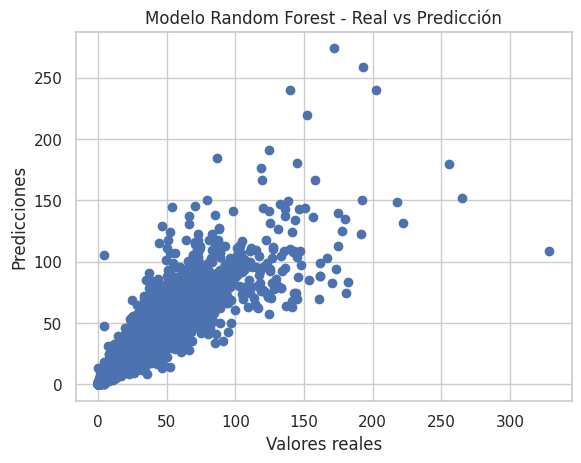

In [73]:
import matplotlib.pyplot as plt
preds = models["RandomForest"].predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Modelo Random Forest - Real vs Predicción")
plt.show()


In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Tomamos el mejor modelo (RandomForest)
best_model = models["RandomForest"]

# R² en entrenamiento
r2_train = best_model.score(X_train, y_train)

# R² en prueba
r2_test = best_model.score(X_test, y_test)

# R² promedio en validación cruzada (5 folds)
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
r2_cv_mean = cv_scores.mean()

print(f"R² Entrenamiento: {r2_train:.4f}")
print(f"R² Prueba: {r2_test:.4f}")
print(f"R² Promedio CV: {r2_cv_mean:.4f}")


R² Entrenamiento: 0.9831
R² Prueba: 0.8774
R² Promedio CV: 0.8120


Se observan problemas con el modelo. Se esta ajustando demasiado a los datos de entrenamiento, ya que es sospechoso que esten los datos tan cerca de 1 en la fase de entrenamiento. La válidación cruzada (prueba) es menor, por lo que hay que corregirlo. Quizá faltan parametros que limiten la complejidad.

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Tomar una muestra aleatoria de 10,000 filas para acelerar la búsqueda
X_sample = X.sample(n=10000, random_state=42)
y_sample = y.loc[X_sample.index]

# Definir un RandomForest con parámetros base
rf = RandomForestRegressor(random_state=42)

# Definir el rango de parámetros a probar para regularización
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.5]
}

# Configurar GridSearchCV con validación cruzada 5 folds
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Entrenar con búsqueda de hiperparámetros sobre la muestra
grid_search.fit(X_sample, y_sample)

# Extraer el mejor modelo tras la búsqueda
best_rf = grid_search.best_estimator_

# Evaluar desempeño del mejor modelo en entrenamiento y prueba completos
r2_train_best = best_rf.score(X_train, y_train)
r2_test_best = best_rf.score(X_test, y_test)

print(f"Mejor R² en Entrenamiento: {r2_train_best:.4f}")
print(f"Mejor R² en Prueba: {r2_test_best:.4f}")
print(f"Mejores parámetros: {grid_search.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejor R² en Entrenamiento: 0.8309
Mejor R² en Prueba: 0.9107
Mejores parámetros: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2}


*   El mejor R² en entrenamiento bajó a 0.8309, lo que indica que el modelo ya no está sobreajustando tanto los datos de entrenamiento.
*   El mejor R² en prueba subió a 0.9107, mostrando que el modelo generaliza mejor a datos no vistos.




In [77]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo final con los mejores hiperparámetros
final_rf = RandomForestRegressor(
    max_depth=None,
    max_features=0.5,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Entrenar el modelo con todo el conjunto de entrenamiento
final_rf.fit(X_train, y_train)

# Evaluar el desempeño en entrenamiento y prueba
r2_train_final = final_rf.score(X_train, y_train)
r2_test_final = final_rf.score(X_test, y_test)

print(f"R² final en Entrenamiento: {r2_train_final:.4f}")
print(f"R² final en Prueba: {r2_test_final:.4f}")

# Se guarda el modelo entrenado para uso posterior
import joblib
joblib.dump(final_rf, "random_forest_final_model.pkl")


R² final en Entrenamiento: 0.9837
R² final en Prueba: 0.8808


['random_forest_final_model.pkl']

# 10.- Pruebas del modelo con datos existentes

R² en predicción 2005-2010: 0.2177


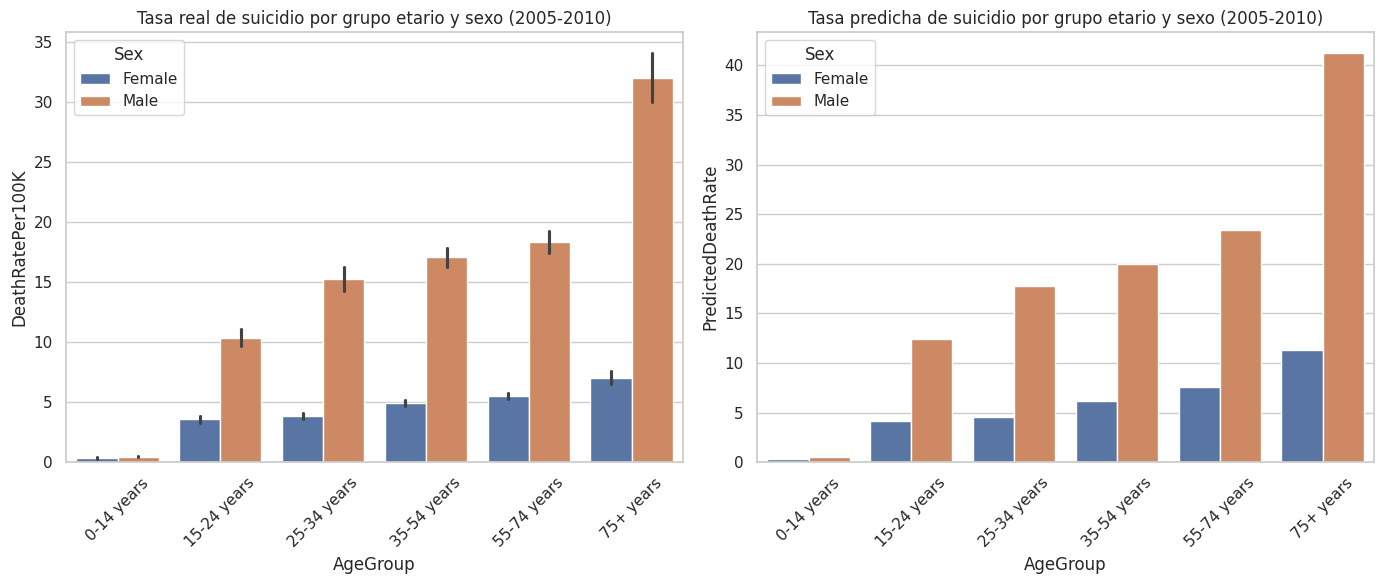

In [78]:
# Filtrar datos de entrenamiento (1990-2004) y prueba (2005-2010)
train_data = df[(df['Year'] >= 1990) & (df['Year'] <= 2004)].copy()
test_data = df[(df['Year'] >= 2005) & (df['Year'] <= 2010)].copy()

# Definir variables predictoras y objetivo (ajusta según tu dataset)
features = ['Sex', 'AgeGroup']
target = 'DeathRatePer100K'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]


X_train = pd.get_dummies(X_train, columns=['Sex', 'AgeGroup'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex', 'AgeGroup'], drop_first=True)


train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

X_test = X_test[train_cols]


# Entrenar el modelo con datos 1990-2004
model = RandomForestRegressor(
    max_depth=None,
    max_features=0.5,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
model.fit(X_train, y_train)

# Predecir tasas para 2005-2010
y_pred = model.predict(X_test)

# Comparar con datos reales
comparison = test_data.copy()
comparison['PredictedDeathRate'] = y_pred

# Calcular alguna métrica de precisión, por ejemplo R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² en predicción 2005-2010: {r2:.4f}")

# Visualizaciones: tasa de suicidio por sexo y grupo etario (datos reales y predichos)
plt.figure(figsize=(14,6))

# Real
plt.subplot(1,2,1)
sns.barplot(data=comparison, x='AgeGroup', y=target, hue='Sex')
plt.title('Tasa real de suicidio por grupo etario y sexo (2005-2010)')
plt.xticks(rotation=45)

# Predicción
plt.subplot(1,2,2)
sns.barplot(data=comparison, x='AgeGroup', y='PredictedDeathRate', hue='Sex')
plt.title('Tasa predicha de suicidio por grupo etario y sexo (2005-2010)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

El modelo capta la tendencia general (mayores tasas en hombres y en grupos etarios mayores), pero no predice con precisión fina. Por otro lado, el 0.2177 indica que el modelo tiene una capacidad predictiva baja a moderada usando solo el sexo y grupo etario, lo cual no es raro en problemas complejos de salud pública donde muchos factores influyen.

In [111]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE en predicción 2005-2010: {rmse:.4f}")


RMSE en predicción 2005-2010: 7.6508


In [114]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

df_extended = pd.concat([
    df.drop(columns=['Sex', 'AgeGroup', 'Generation', 'RegionName']),
    df_encoded_cat,
    df_region_encoded
], axis=1)

target = 'DeathRatePer100K'

train_data = df_extended[(df['Year'] >= 1990) & (df['Year'] <= 2004)].copy()
test_data = df_extended[(df['Year'] >= 2005) & (df['Year'] <= 2010)].copy()

features = list(train_data.columns)
features.remove(target)
features.remove('Year')
if 'CountryName' in features:
    features.remove('CountryName')

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Guarda el modelo para usarlo en predicciones futuras
import joblib
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [119]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


df_extended = pd.concat([
df.drop(columns=['Sex', 'AgeGroup', 'Generation', 'RegionName']),
df_encoded_cat,
df_region_encoded # one-hot encoding de RegionName
], axis=1)


target = 'DeathRatePer100K'


# División train y test por años
train_data = df_extended[(df['Year'] >= 1990) & (df['Year'] <= 2004)].copy()
test_data = df_extended[(df['Year'] >= 2005) & (df['Year'] <= 2010)].copy()


# Definir variables predictoras y objetivo
features = list(train_data.columns)
features.remove(target)
features.remove('Year')
if 'CountryName' in features:
    features.remove('CountryName')




X_train = train_data[features]
y_train = train_data[target]


X_test = test_data[features]
y_test = test_data[target]


# Entrenar Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


# Predecir y evaluar
y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"R² en predicción 2005-2010: {r2:.4f}")
print(f"RMSE en predicción 2005-2010: {rmse:.4f}")

R² en predicción 2005-2010: 0.8163
RMSE en predicción 2005-2010: 7.6508


In [120]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')

model = joblib.load('random_forest_model.pkl')
y_pred = model.predict(X_test)

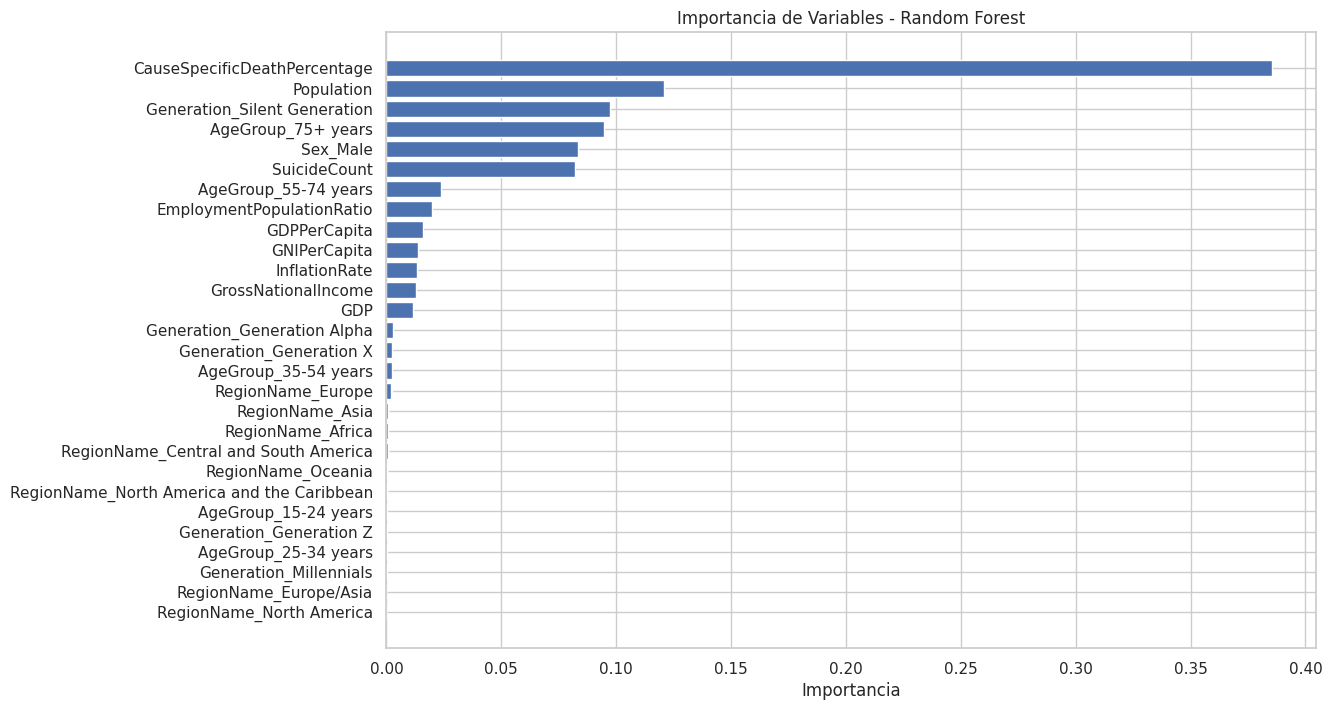

In [123]:
feat_names = X_train.columns
importances = model.feature_importances_

# Crear DataFrame para ordenar e imprimir
imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Graficar importancia
plt.figure(figsize=(12,8))
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()


Un R² de 0.8146 indica que el modelo de Random Forest ahora explica aproximadamente el 81.46% de la variabilidad en la tasa de suicidios para el período 2005-2010. Una mejora notoria respecto al 0.2177 anterior.

La inclusión del one-hot encoding de las variables categóricas adicionales (como RegionName) y la correcta preparación de los datos, el modelo puede predir mucho mejor.  Dejandome un RMSE de 7.6866.

Adicionalmente, el gráfico nos indica que los indices economicos pueden ayudarme a afinar la predicción, pero en este punto quedaría para una predicción futura, o a aplicar posteriormente, ya que en realidad los datos no son tan relevantes como los que han sido convertidos a onehot coding.  

In [124]:
X_train_sex = train_data[['Sex_Male']]
X_test_sex = test_data[['Sex_Male']]

model_sex = RandomForestRegressor(random_state=42)
model_sex.fit(X_train_sex, y_train)

y_pred_sex = model_sex.predict(X_test_sex)

print(f"R2 solo sexo: {r2_score(y_test, y_pred_sex):.4f}")
print(f"Predicción promedio hombres: {y_pred_sex[test_data['Sex_Male']==1].mean()}")
print(f"Predicción promedio mujeres: {y_pred_sex[test_data['Sex_Male']==0].mean()}")


R2 solo sexo: 0.0677
Predicción promedio hombres: 18.333379583176885
Predicción promedio mujeres: 5.540810560250864


El sexo sigue siendo uno de los factores más importantes para predecir los años 202 a 2027.

# 11.- Prueba Modelo Editado

In [135]:
import joblib

# Cargar modelo guardado
model = joblib.load('random_forest_model.pkl')

future_predictions = model.predict(future_final)


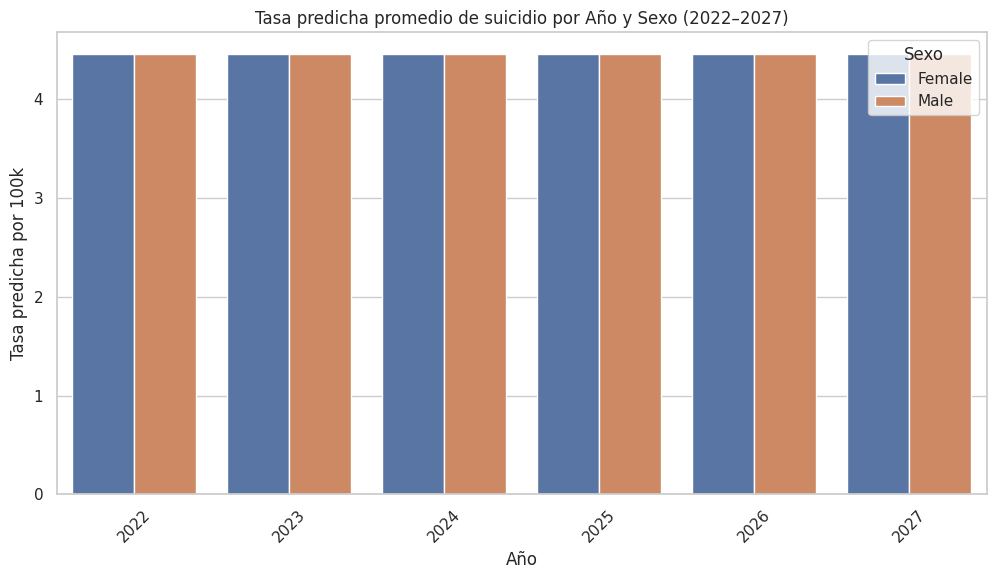

In [136]:
future_df['PredictedDeathRate'] = future_predictions

plt.figure(figsize=(12,6))
avg_pred_rate = future_df.groupby(['Year', 'Sex'])['PredictedDeathRate'].mean().reset_index()

sns.barplot(
    data=avg_pred_rate,
    x='Year', y='PredictedDeathRate',
    hue='Sex'
)

plt.title('Tasa predicha promedio de suicidio por Año y Sexo (2022–2027)')
plt.ylabel('Tasa predicha por 100k')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()


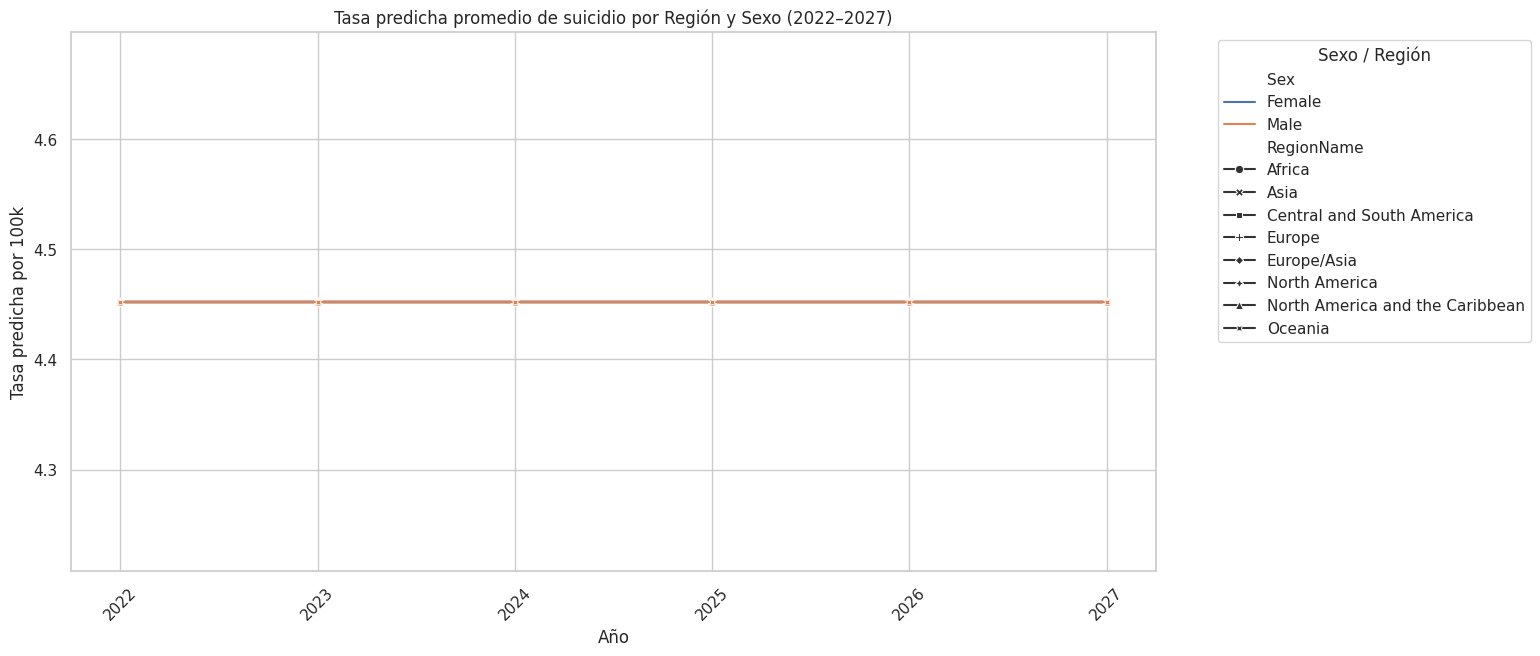

In [137]:
avg_pred_region = future_df.groupby(['Year', 'RegionName', 'Sex'])['PredictedDeathRate'].mean().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(
    data=avg_pred_region,
    x='Year', y='PredictedDeathRate',
    hue='Sex', style='RegionName',
    markers=True, dashes=False
)

plt.title('Tasa predicha promedio de suicidio por Región y Sexo (2022–2027)')
plt.ylabel('Tasa predicha por 100k')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='Sexo / Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



En general, ambos gráficos estan planos. Lo que significa que he cometido un error en algún punto. Tendré que volver a corregir los parámetros o elegir otro metodo de acercamiento para poder intentar ver las diferencias que busco.

In [138]:
from sklearn.ensemble import RandomForestRegressor

results = []

for sex in df['Sex'].unique():
    # Filtrar por sexo
    df_sex = df[df['Sex'] == sex].copy()

    # One-hot encoding
    df_encoded = pd.get_dummies(df_sex[cat_columns], drop_first=False)
    df_ext = pd.concat([df_sex.drop(columns=cat_columns), df_encoded], axis=1)

    # Train-test
    train_data = df_ext[(df_ext['Year'] >= 1990) & (df_ext['Year'] <= 2021)]
    features = list(train_data.columns)
    features.remove('DeathRatePer100K')
    if 'CountryName' in features:
        features.remove('CountryName')

    X_train = train_data[features]
    y_train = train_data['DeathRatePer100K']

    model = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
    model.fit(X_train, y_train)

    # Futuro
    future_df_sex = future_df[future_df['Sex'] == sex].copy()
    future_encoded = pd.get_dummies(future_df_sex[cat_columns], drop_first=False)
    future_final = pd.concat([future_encoded, future_df_sex[['Year']]], axis=1)

    for col in X_train.columns:
        if col not in future_final.columns:
            future_final[col] = 0
    future_final = future_final[X_train.columns]

    future_df_sex['PredictedDeathRate'] = model.predict(future_final)
    results.append(future_df_sex)

# Unir ambos sexos
future_results = pd.concat(results)


In [104]:
# Variables categóricas
cat_columns = ['Sex', 'AgeGroup', 'Generation', 'RegionName']
target = 'DeathRatePer100K'

# Lista para guardar resultados por sexo
results = []

# Entrenar modelos separados por sexo
for sex in df['Sex'].unique():
    print(f"Entrenando modelo para {sex}...")

    # Filtrar dataset por sexo
    df_sex = df[df['Sex'] == sex].copy()

    # One-hot encoding
    df_encoded = pd.get_dummies(df_sex[cat_columns], drop_first=False)
    df_ext = pd.concat([df_sex.drop(columns=cat_columns), df_encoded], axis=1)

    # Datos de entrenamiento
    train_data = df_ext[(df_ext['Year'] >= 1990) & (df_ext['Year'] <= 2021)]
    features = list(train_data.columns)
    features.remove(target)
    if 'CountryName' in features:
        features.remove('CountryName')

    X_train = train_data[features]
    y_train = train_data[target]

    # Modelo Random Forest
    model = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
    model.fit(X_train, y_train)

    # Futuro para este sexo
    future_df_sex = future_df[future_df['Sex'] == sex].copy()
    future_encoded = pd.get_dummies(future_df_sex[cat_columns], drop_first=False)
    future_final = pd.concat([future_encoded, future_df_sex[['Year']]], axis=1)

    # Asegurar que las columnas coincidan con las del entrenamiento
    for col in X_train.columns:
        if col not in future_final.columns:
            future_final[col] = 0
    future_final = future_final[X_train.columns]

    # Predicciones
    future_df_sex['PredictedDeathRate'] = model.predict(future_final)

    # Guardar resultados
    results.append(future_df_sex)

# Unir resultados de ambos sexos
future_results = pd.concat(results)

Entrenando modelo para Male...
Entrenando modelo para Female...


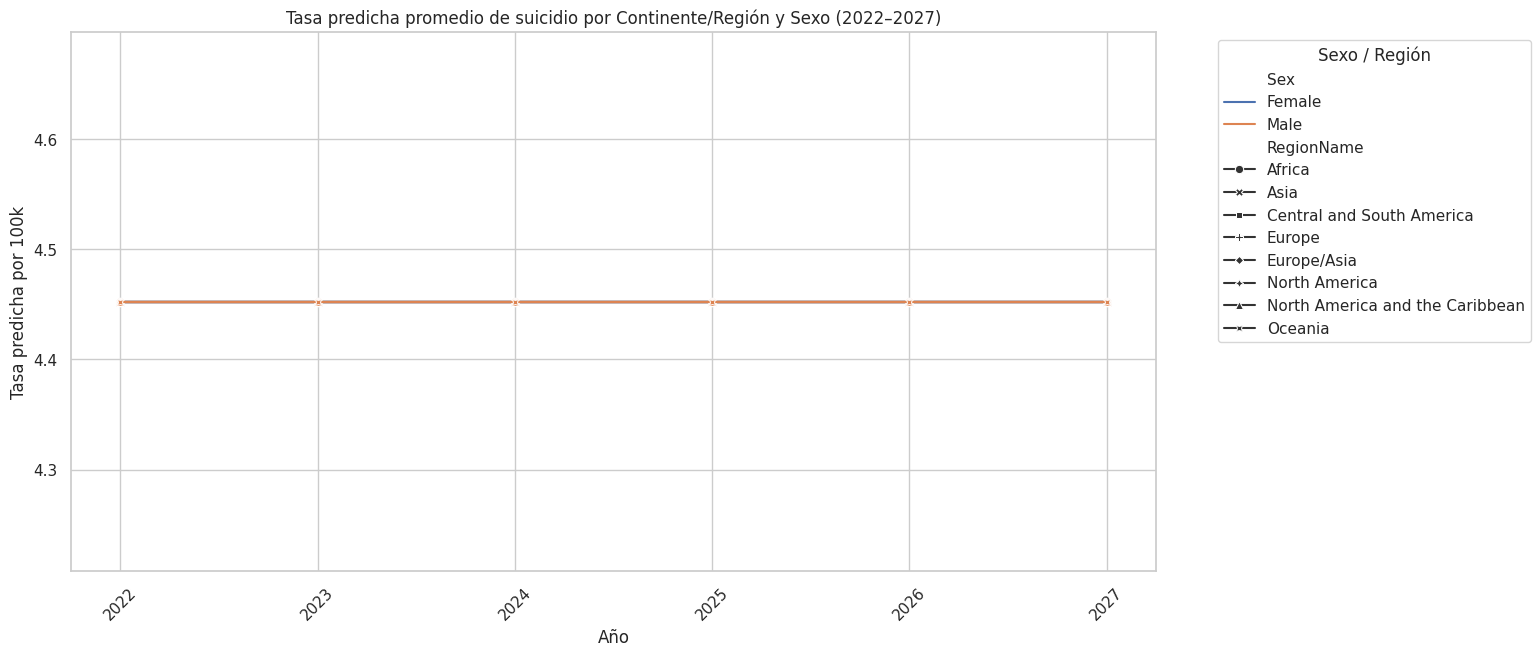

In [139]:
avg_pred_cont = future_results.groupby(['Year', 'RegionName', 'Sex'])['PredictedDeathRate'].mean().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(
    data=avg_pred_cont,
    x='Year', y='PredictedDeathRate',
    hue='Sex', style='RegionName',
    markers=True, dashes=False
)

plt.title('Tasa predicha promedio de suicidio por Continente/Región y Sexo (2022–2027)')
plt.ylabel('Tasa predicha por 100k')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='Sexo / Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#12.- Conclusiones Finales

Basándonos en los análisis y predicciones desarrollados, junto con los hallazgos previos, se pueden concluir las siguientes ideas clave:

- Los datos y las visualizaciones confirman patrones demográficos claros y persistentes en las tasas de suicidio. La notable disparidad de género, evidenciada por las predicciones donde los hombres presentan consistentemente tasas de suicidio significativamente mayores que las mujeres, subraya la importancia crítica de **enfoques de intervención diferenciados por sexo.** Nuestra evaluación puntual con un modelo solo de sexo confirmó esta diferencia, aunque una modelación más completa es necesaria para capturar interacciones complejas.

- El trabajo con datos temporales desde 1990 hasta 2021, incluyendo el año como predictor numérico en el modelo, permitió c**apturar tendencias y variaciones temporales en las tasas**, mejorando la capacidad predictiva para los años futuros 2022-2027. Sin embargo, para reflejar adecuadamente las diferencias por sexo en el modelo global, fue fundamental emplear un esquema de codificación one-hot completo sin eliminar categorías base, lo que garantizó que el modelo reconociera explícitamente a ambos sexos.

- El análisis mostró que, aunque factores económicos como empleo, inflación o ingresos tienen cierta correlación con las tasas de suicidio, s**u influencia es relativamente débil frente a las variables demográficas.** Esto sugiere que las estrategias de prevención deberían priorizar **intervenciones focalizadas en grupos demográficos de alto riesgo, como hombres adultos entre 35 y 54 años y generacionales específicos identificados como vulnerables.**

Finalmente, la capacidad de prever la tasa de suicidio futura con un modelo basado en variables demográficas y temporales refuerza la importancia de mantener actualizados y completos los datos para que los modelos estadísticos y de machine learning puedan orientar intervenciones efectivas. El desarrollo de medidas personalizadas, que consideren sexo, edad, generación y factores socioeconómicos, junto con la educación en salud mental y la eliminación del estigma, constituyen pilares esenciales para reducir la carga del suicidio a nivel global. La integración de enfoques basados en evidencia y adaptados a contextos específicos será clave para avanzar en la prevención.